### USED CAR PRICE PREDICTION
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

### Importing the necessary libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import NuSVR
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PowerTransformer
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from datetime import date
import random
import joblib
import math
%matplotlib inline

### Importing all the collected data from the websites

In [2]:
data=pd.read_csv('car_data.csv')
pd.set_option('max_columns', None)
data.head(10)

,year,fuel,kms,owners,transmission,mileage,engine,power,power_rpm,seats,gear,drive,steering,torque,torque_rpm,values_cylinder,no_cylinder,price
0,1995,Diesel,35000.0,4,Manual,0.0,2112,0,0,6,NaN,-,Power,0,0,4,4,215000.0
1,2016,Diesel,120000.0,1,Manual,28.09,1248,88.5,4000.0,5,5,FWD,Power,200,1750,4,4,700000.0
2,2014,Petrol,60000.0,2,Manual,16.51,1586,103.2,5600.0,5,5,FWD,Power,145,4100,4,4,315000.0
3,2017,Petrol,40000.0,1,Manual,21.21,1197,81.8,6000.0,5,5,FWD,Power,113,4200,4,4,580000.0
4,2018,Petrol,46000.0,1,Manual,23.1,998,67.04,6000.0,5,5,FWD,Power,90,3500,4,3,409999.99999999994
5,2020,Diesel,4500.0,1,Automatic,13.9,1996,167.62,3500.0,7,10,RWD,Power,420,2500,4,4,3500000.0
6,2008,Diesel,120000.0,3,Manual,12.05,2179,120.0,4000.0,7,5,FWD,Power,290,2800,4,4,350000.0
7,2015,Petrol,62100.0,2,Manual,20.85,1197,83.14,6000.0,5,5,FWD,Power,115,4000,4,4,580000.0
8,2010,Petrol,50000.0,1,Manual,16.5,995,63,5,5,5,FWD,Power,90.3,4200,2,4,110000.00000000001
9,2015,Diesel,204000.0,1,Manual,22.54,1396,88.73,4000.0,5,6,FWD,Power,219.7,2750,4,4,450000.0


### Preprocess refine the data accordingly, fix column data values & conv categorical value into numerical

In [3]:
for i in range(len(data.owners.values)):
    if data.owners.values[i]=='First' or data.owners.values[i]=='1':
        data['owners'].iloc[i]=1
    elif data.owners.values[i]=='Second' or data.owners.values[i]=='2':
        data['owners'].iloc[i]=2
    elif data.owners.values[i]=='Third' or data.owners.values[i]=='3':
        data['owners'].iloc[i]=3
    elif data.owners.values[i]=='Fourth'or data.owners.values[i]=='4':
        data['owners'].iloc[i]=4
    elif data.owners.values[i]=='0':
        data['owners'].iloc[i]=0
for i in range(len(data.transmission.values)):
    if data.transmission.values[i]=='-' or data.transmission.values[i]=='0':
        data['transmission'].iloc[i]=0
for i in range(len(data.mileage.values)):
    if data.mileage.values[i]=='-':
        data['mileage'].iloc[i]=0
data["mileage"] = pd.to_numeric(data["mileage"])
for i in range(len(data['engine'].values)):
    try:
        data['engine'].iloc[i]=int(data['engine'].iloc[i])
    except:
        data['engine'].iloc[i]=0
for i in range(len(data['power'].values)):
    try:
        data['power'].iloc[i]=float(data['power'].iloc[i])
    except:
        data['power'].iloc[i]=0
for i in range(len(data['power_rpm'].values)):
    try:
        data['power_rpm'].iloc[i]=int(data['power_rpm'].iloc[i])
    except:
        data['power_rpm'].iloc[i]=0
for i in range(len(data['seats'].values)):
    try:
        data['seats'].iloc[i]=int(data['seats'].iloc[i])
    except:
        data['seats'].iloc[i]=0
for i in range(len(data['gear'].values)):
    try:
        data['gear'].iloc[i]=int(data['gear'].iloc[i])
    except:
        data['gear'].iloc[i]=0
for i in range(len(data['torque'].values)):
    try:
        data['torque'].iloc[i]=float(data['torque'].iloc[i])
    except:
        data['torque'].iloc[i]=0
for i in range(len(data['torque_rpm'].values)):
    try:
        data['torque_rpm'].iloc[i]=int(data['torque_rpm'].iloc[i])
    except:
        data['torque_rpm'].iloc[i]=0
for i in range(len(data['values_cylinder'].values)):
    try:
        data['values_cylinder'].iloc[i]=int(data['values_cylinder'].iloc[i])
    except:
        data['values_cylinder'].iloc[i]=0
for i in range(len(data['no_cylinder'].values)):
    try:
        data['no_cylinder'].iloc[i]=int(data['no_cylinder'].iloc[i])
    except:
        data['no_cylinder'].iloc[i]=0
for i in range(len(data.price.values)):
    if type(data.price.values[i])!=int and len(data.price.values[i].split())>1:
        if type(data.price.values[i].split()[1])!=int and ''.join(data.price.values[i].split()[1].split(',')).isdigit():
            data['price'].iloc[i]=int(''.join(data.price.values[i].split()[1].split(',')))
        else:
            data['price'].iloc[i]=int(data.price.values[i].split()[1])
    if type(data.price.values[i])!=int and ''.join(data.price.values[i].split(',')).isdigit():
            data['price'].iloc[i]=int(''.join(data.price.values[i].split(',')))
for i in range(len(data.price.values)):
    data['price'].iloc[i]=int(float(data['price'].iloc[i]))
data["owners"] = pd.to_numeric(data["owners"])
data["engine"] = pd.to_numeric(data["engine"])
data["power"] = pd.to_numeric(data["power"])
data["power_rpm"] = pd.to_numeric(data["power_rpm"])
data["seats"] = pd.to_numeric(data["seats"])
data["gear"] = pd.to_numeric(data["gear"])
data["values_cylinder"] = pd.to_numeric(data["values_cylinder"])
data["no_cylinder"] = pd.to_numeric(data["no_cylinder"])
data["price"] = data["price"].astype(int)
data["kms"] = data["kms"].astype(int)
data['torque_rpm']=data['torque_rpm'].astype(int)
data['torque']=data['torque'].astype(int)
dicty={'transmission':{'Manual':1,'Automatic':2,0:0},'fuel':{'Petrol':5,'Diesel':4,'CNG':3,'LPG':2,'Hybrid':1},
      'drive':{'AWD':3,'FWD':2,'RWD':1,'-':0}}
for j in ['transmission','fuel','drive']:
    for i in [j]:
        data[i]=data[i].apply(lambda x:dicty[i][x])
data["transmission"] = data["transmission"].astype(int)
data['fuel']=data['fuel'].astype(int)
data['drive']=data['drive'].astype(int)

In [4]:
data

,year,fuel,kms,owners,transmission,mileage,engine,power,power_rpm,seats,gear,drive,steering,torque,torque_rpm,values_cylinder,no_cylinder,price
0,1995,4,35000,4,1,0.00,2112,0.00,0,6,0,0,Power,0,0,4,4,215000
1,2016,4,120000,1,1,28.09,1248,88.50,0,5,5,2,Power,200,1750,4,4,700000
2,2014,5,60000,2,1,16.51,1586,103.20,0,5,5,2,Power,145,4100,4,4,315000
3,2017,5,40000,1,1,21.21,1197,81.80,0,5,5,2,Power,113,4200,4,4,580000
4,2018,5,46000,1,1,23.10,998,67.04,0,5,5,2,Power,90,3500,4,3,409999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,2017,4,40000,1,2,18.56,1995,190.00,4000,5,8,3,Power,400,1750,4,4,3250000
9803,2015,4,14000,1,2,16.66,1968,177.00,3750,5,0,2,Power,380,1750,4,4,2150000
9804,2019,5,15000,1,2,0.00,1991,194.00,5500,5,9,1,Power,320,1650,4,4,5290000
9805,2020,5,15000,1,2,17.00,1353,138.00,6000,5,7,2,Power,242,1500,4,4,1900000


In [5]:
data.steering.value_counts()

Power     8425
-         1290
Manual      92
Name: steering, dtype: int64

### drop column steering as majority value contains power as data value

In [6]:
data=data.drop(['steering'],axis=1)
data

,year,fuel,kms,owners,transmission,mileage,engine,power,power_rpm,seats,gear,drive,torque,torque_rpm,values_cylinder,no_cylinder,price
0,1995,4,35000,4,1,0.00,2112,0.00,0,6,0,0,0,0,4,4,215000
1,2016,4,120000,1,1,28.09,1248,88.50,0,5,5,2,200,1750,4,4,700000
2,2014,5,60000,2,1,16.51,1586,103.20,0,5,5,2,145,4100,4,4,315000
3,2017,5,40000,1,1,21.21,1197,81.80,0,5,5,2,113,4200,4,4,580000
4,2018,5,46000,1,1,23.10,998,67.04,0,5,5,2,90,3500,4,3,409999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,2017,4,40000,1,2,18.56,1995,190.00,4000,5,8,3,400,1750,4,4,3250000
9803,2015,4,14000,1,2,16.66,1968,177.00,3750,5,0,2,380,1750,4,4,2150000
9804,2019,5,15000,1,2,0.00,1991,194.00,5500,5,9,1,320,1650,4,4,5290000
9805,2020,5,15000,1,2,17.00,1353,138.00,6000,5,7,2,242,1500,4,4,1900000


In [7]:
data.columns

Index(['year', 'fuel', 'kms', 'owners', 'transmission', 'mileage', 'engine',
       'power', 'power_rpm', 'seats', 'gear', 'drive', 'torque', 'torque_rpm',
       'values_cylinder', 'no_cylinder', 'price'],
      dtype='object')

### Looking at the amount of data available in the combined dataset

In [8]:
print('Number of rows x columns in dataset are:',data.shape)

Number of rows x columns in dataset are: (9807, 17)


In [9]:
print('Dataset contains any null values:',data.isnull().values.any())

Dataset contains any null values: False


### Checking for the data type

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807 entries, 0 to 9806
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             9807 non-null   int64  
 1   fuel             9807 non-null   int32  
 2   kms              9807 non-null   int32  
 3   owners           9807 non-null   int64  
 4   transmission     9807 non-null   int32  
 5   mileage          9807 non-null   float64
 6   engine           9807 non-null   int64  
 7   power            9807 non-null   float64
 8   power_rpm        9807 non-null   int64  
 9   seats            9807 non-null   int64  
 10  gear             9807 non-null   int64  
 11  drive            9807 non-null   int32  
 12  torque           9807 non-null   int32  
 13  torque_rpm       9807 non-null   int32  
 14  values_cylinder  9807 non-null   int64  
 15  no_cylinder      9807 non-null   int64  
 16  price            9807 non-null   int32  
dtypes: float64(2),

### categorical column: year, fuel, owners,transmission,seats,gear,drive,values_cylinder,no_cylinder
### non categorical column: kms,mileage,engine,	power,power_rpm,torque	torque_rpm

### now use describe func and analyze dataset

In [11]:
data.describe()

,year,fuel,kms,owners,transmission,mileage,engine,power,power_rpm,seats,gear,drive,torque,torque_rpm,values_cylinder,no_cylinder,price
count,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9.807000e+03
mean,2015.275517,4.524421,52637.781279,1.187213,1.273478,17.971169,1509.431325,107.292730,2372.082084,5.183950,5.236056,1.812073,196.053737,2869.060977,3.751606,3.838891,1.056607e+06
std,3.098123,0.527628,34571.329637,0.436023,0.495805,6.099944,638.297041,60.316947,2526.569381,1.009245,1.495200,0.647927,127.078506,1255.461087,0.848203,0.888057,1.506989e+06
min,1989.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+04
25%,2013.000000,4.000000,29000.000000,1.000000,1.000000,15.400000,1197.000000,74.000000,0.000000,5.000000,5.000000,2.000000,112.000000,1750.000000,4.000000,4.000000,3.900000e+05
50%,2016.000000,5.000000,48914.000000,1.000000,1.000000,18.700000,1248.000000,88.730000,4.000000,5.000000,5.000000,2.000000,160.000000,2800.000000,4.000000,4.000000,5.790000e+05
75%,2018.000000,5.000000,70091.000000,1.000000,2.000000,21.790000,1598.000000,122.000000,4200.000000,5.000000,6.000000,2.000000,250.000000,4000.000000,4.000000,4.000000,9.750000e+05
max,2021.000000,5.000000,910000.000000,4.000000,2.000000,33.540000,5998.000000,626.000000,8250.000000,10.000000,10.000000,3.000000,900.000000,6500.000000,5.000000,12.000000,2.550000e+07


### search for duplicate values in dataset

In [12]:
data[data.duplicated()]

,year,fuel,kms,owners,transmission,mileage,engine,power,power_rpm,seats,gear,drive,torque,torque_rpm,values_cylinder,no_cylinder,price
283,2015,4,30000,2,2,22.69,1995,190.00,0,5,8,1,400,2500,4,4,2300000
379,2015,5,11000,1,1,18.60,1197,81.83,0,5,5,2,114,4000,4,4,620000
478,2007,5,64000,1,1,13.50,1799,130.00,0,5,5,2,172,4300,4,4,375000
511,2018,4,62037,1,1,27.39,1248,74.00,0,5,5,2,190,2000,4,4,680000
588,2005,5,80481,1,1,19.70,796,46.30,0,5,5,2,62,3000,4,3,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,2016,5,43000,1,2,14.74,1991,181.00,5500,5,7,1,300,1200,4,4,2800000
9802,2017,4,40000,1,2,18.56,1995,190.00,4000,5,8,3,400,1750,4,4,3250000
9803,2015,4,14000,1,2,16.66,1968,177.00,3750,5,0,2,380,1750,4,4,2150000
9804,2019,5,15000,1,2,0.00,1991,194.00,5500,5,9,1,320,1650,4,4,5290000


### drop all the duplicates

In [13]:
data=data.drop_duplicates()
data

,year,fuel,kms,owners,transmission,mileage,engine,power,power_rpm,seats,gear,drive,torque,torque_rpm,values_cylinder,no_cylinder,price
0,1995,4,35000,4,1,0.00,2112,0.00,0,6,0,0,0,0,4,4,215000
1,2016,4,120000,1,1,28.09,1248,88.50,0,5,5,2,200,1750,4,4,700000
2,2014,5,60000,2,1,16.51,1586,103.20,0,5,5,2,145,4100,4,4,315000
3,2017,5,40000,1,1,21.21,1197,81.80,0,5,5,2,113,4200,4,4,580000
4,2018,5,46000,1,1,23.10,998,67.04,0,5,5,2,90,3500,4,3,409999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,2016,4,79000,1,1,24.80,1582,126.00,4000,5,6,2,260,1900,4,4,661000
9795,2014,5,75000,1,1,16.80,1497,116.00,6600,5,5,2,146,4800,4,4,498000
9796,2007,5,76000,1,2,13.90,1799,130.00,6300,5,5,2,171,4300,4,4,185000
9797,2017,4,44000,1,1,22.27,1498,99.00,3750,5,5,2,205,1750,2,4,680000


### from the start our target was to gather as much as data as possible and select the best 5k datapoints to train our model, hence no need to worry about data loss till data value doesnt drop below 5k

### find the current year and prep data of column year to find out how old the vehice is

In [14]:
todays_date = date.today()
current_year=todays_date.year
current_year

2021

In [15]:
for i in range(len(data.year.values)):
    data['year'].iloc[i]=current_year-data['year'].iloc[i]
data

,year,fuel,kms,owners,transmission,mileage,engine,power,power_rpm,seats,gear,drive,torque,torque_rpm,values_cylinder,no_cylinder,price
0,26,4,35000,4,1,0.00,2112,0.00,0,6,0,0,0,0,4,4,215000
1,5,4,120000,1,1,28.09,1248,88.50,0,5,5,2,200,1750,4,4,700000
2,7,5,60000,2,1,16.51,1586,103.20,0,5,5,2,145,4100,4,4,315000
3,4,5,40000,1,1,21.21,1197,81.80,0,5,5,2,113,4200,4,4,580000
4,3,5,46000,1,1,23.10,998,67.04,0,5,5,2,90,3500,4,3,409999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,5,4,79000,1,1,24.80,1582,126.00,4000,5,6,2,260,1900,4,4,661000
9795,7,5,75000,1,1,16.80,1497,116.00,6600,5,5,2,146,4800,4,4,498000
9796,14,5,76000,1,2,13.90,1799,130.00,6300,5,5,2,171,4300,4,4,185000
9797,4,4,44000,1,1,22.27,1498,99.00,3750,5,5,2,205,1750,2,4,680000


### Visualization:

### Univariate analysis

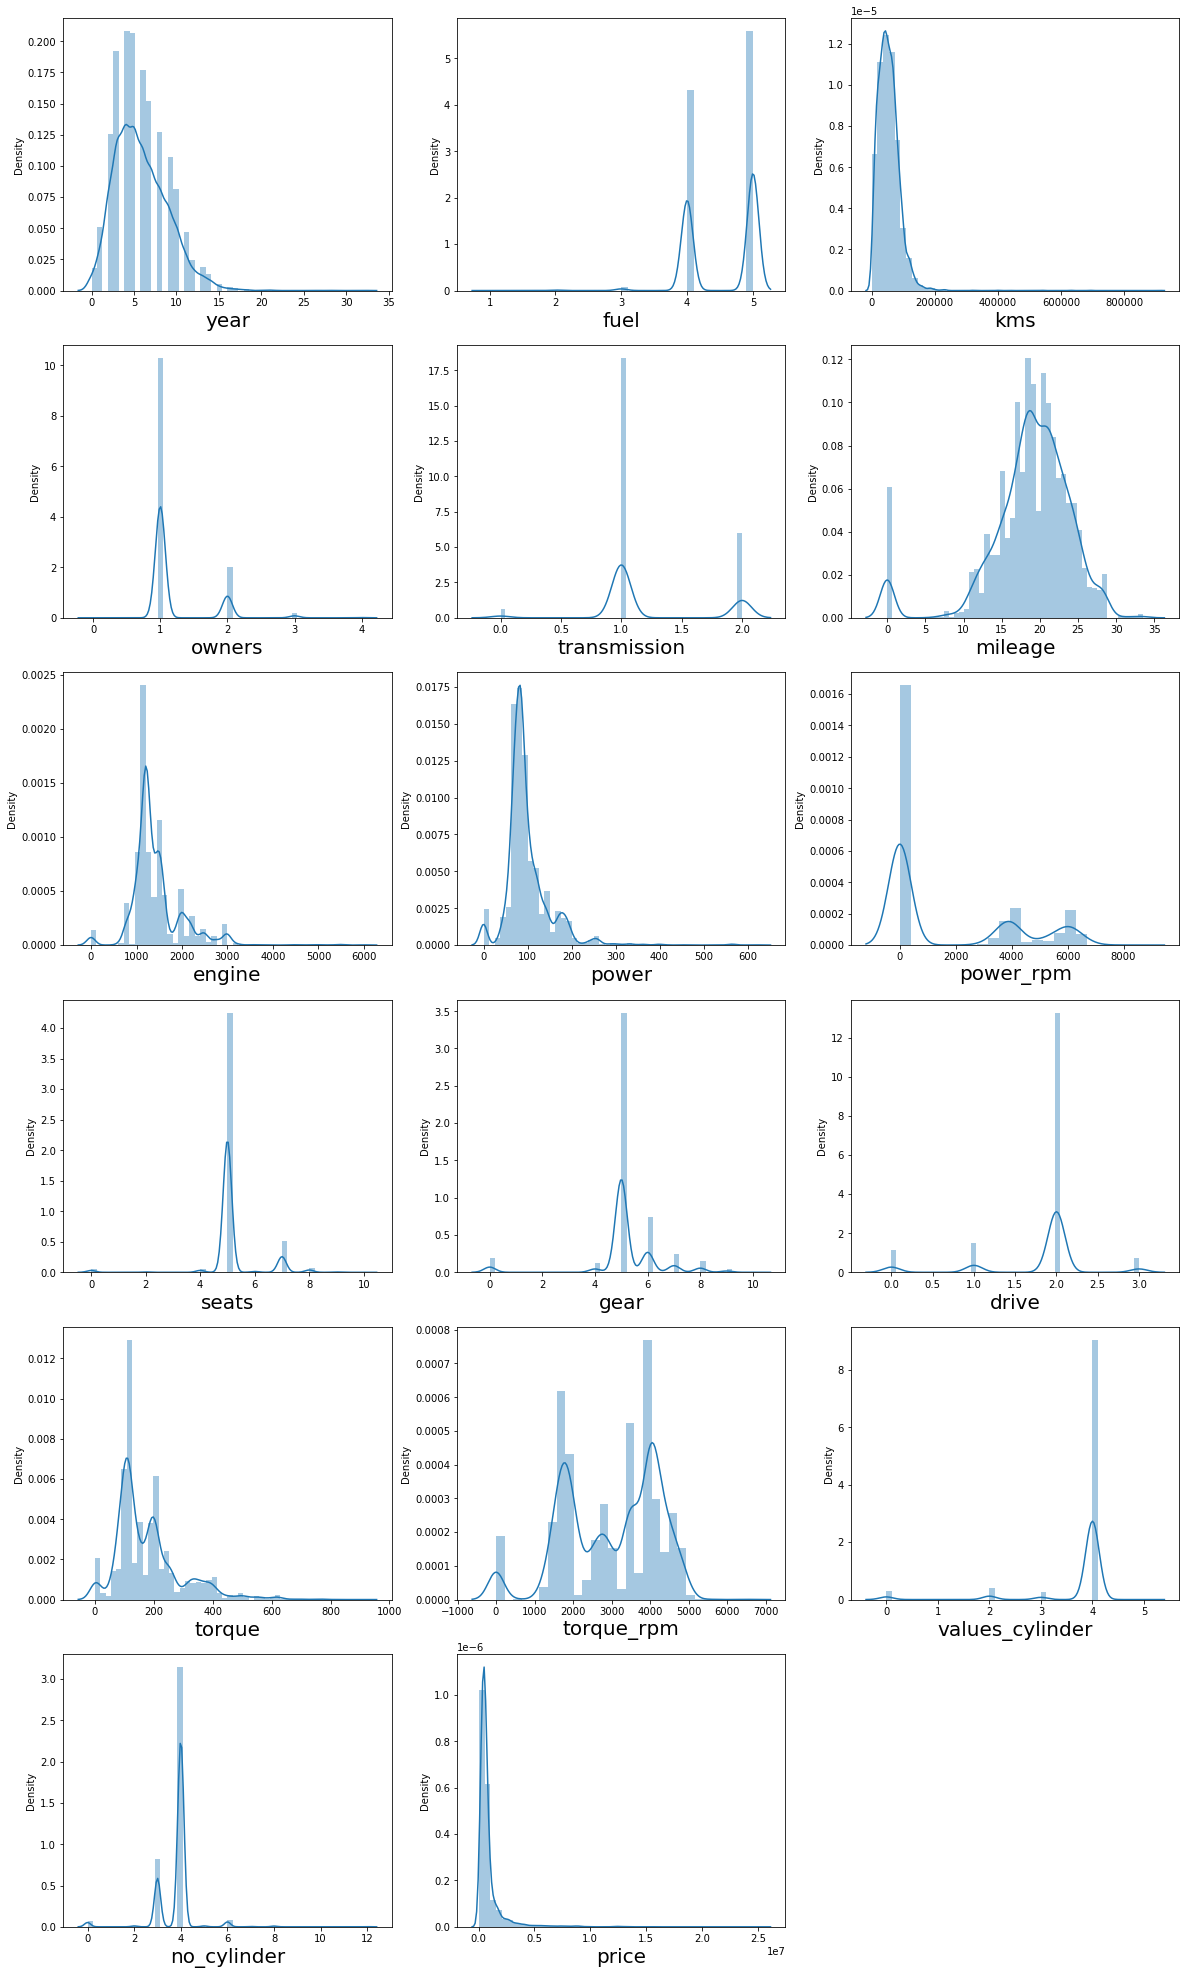

In [16]:
plt.figure(figsize=(20,300),facecolor='white')
plotnumber=1
for column in data.columns:
    if plotnumber<=len(data.columns):
        ax=plt.subplot(50,3,plotnumber)
        sn.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### observations for non categorical columns:
- kms column has normal distributed value points but it is highly skewed and contains coutliers
- mileage column has bimodal distributed value points with less skewness and less outlirs
- engine & power column has normal distributed value points but contain outliers
- power_rpm column has bimodal distributed value points 
- torque & torque_rpm column has bimodal distributed value points with outliers

### check value_counts of categorical column if any column contains more than 90% same data point drop it

In [17]:
data.values_cylinder.value_counts()

4    6777
2     292
0     229
3     191
5       2
Name: values_cylinder, dtype: int64

In [18]:
data=data.drop(['values_cylinder'],axis=1)
data

,year,fuel,kms,owners,transmission,mileage,engine,power,power_rpm,seats,gear,drive,torque,torque_rpm,no_cylinder,price
0,26,4,35000,4,1,0.00,2112,0.00,0,6,0,0,0,0,4,215000
1,5,4,120000,1,1,28.09,1248,88.50,0,5,5,2,200,1750,4,700000
2,7,5,60000,2,1,16.51,1586,103.20,0,5,5,2,145,4100,4,315000
3,4,5,40000,1,1,21.21,1197,81.80,0,5,5,2,113,4200,4,580000
4,3,5,46000,1,1,23.10,998,67.04,0,5,5,2,90,3500,3,409999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,5,4,79000,1,1,24.80,1582,126.00,4000,5,6,2,260,1900,4,661000
9795,7,5,75000,1,1,16.80,1497,116.00,6600,5,5,2,146,4800,4,498000
9796,14,5,76000,1,2,13.90,1799,130.00,6300,5,5,2,171,4300,4,185000
9797,4,4,44000,1,1,22.27,1498,99.00,3750,5,5,2,205,1750,4,680000


### Univariate analysis for categorical columns:

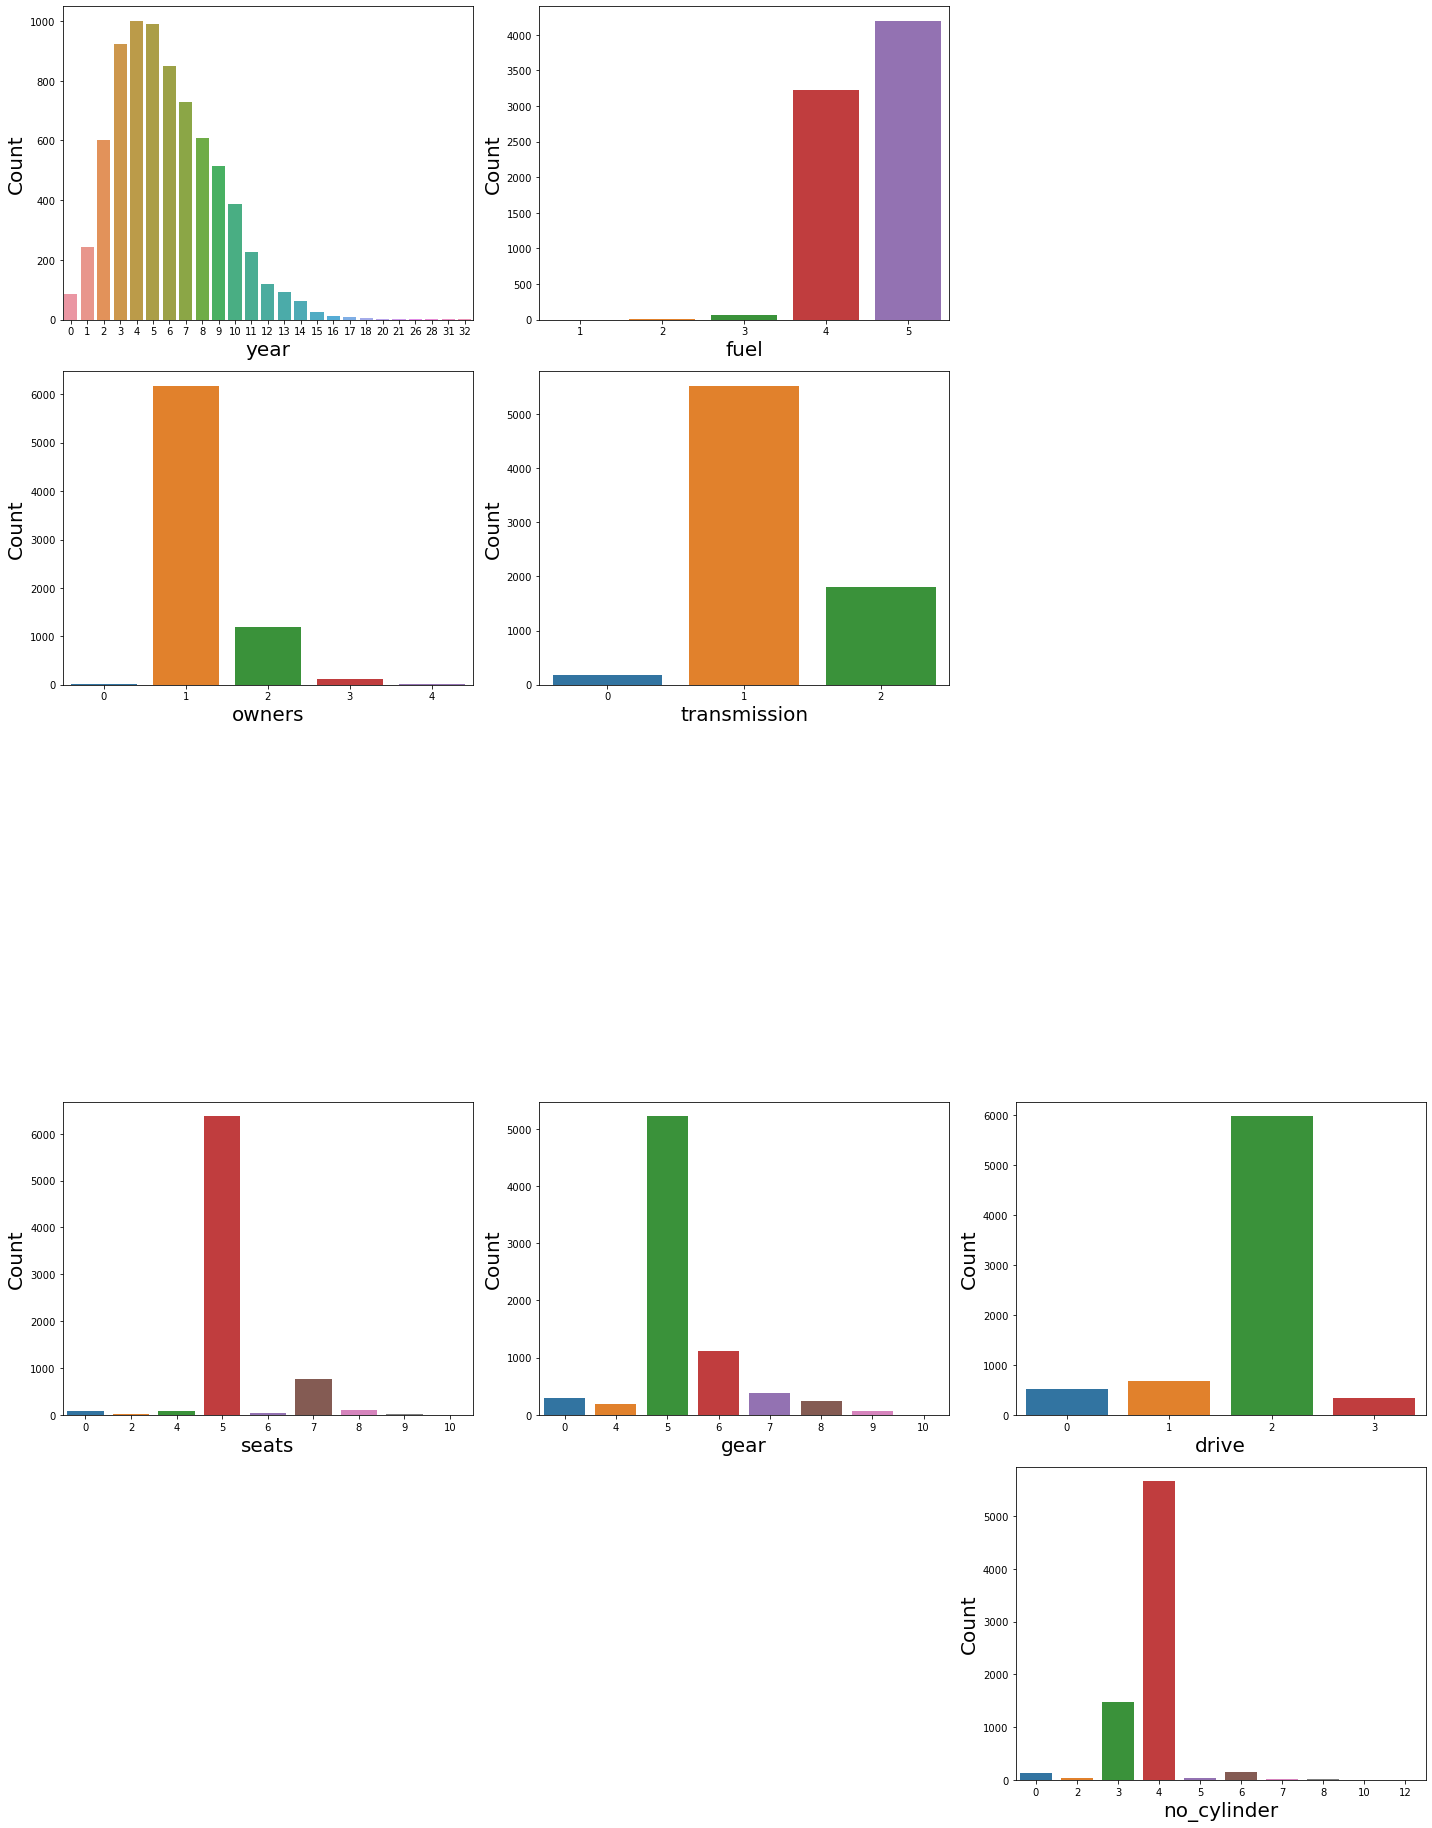

In [19]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for i in data.columns:
    if i not in ['kms','mileage','engine','power','power_rpm','torque','torque_rpm'] and i!='price':
        ax=plt.subplot(6,3,plotnumber)
        sn.countplot(data[i])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### From the above graph we can observe the value_counts of datapoints of resp column
### we can make a note about the data i.e.,  dataset contains data mostly of which year, transmision, range of gears of a car.........

### Bivariate analysis for numerical columns

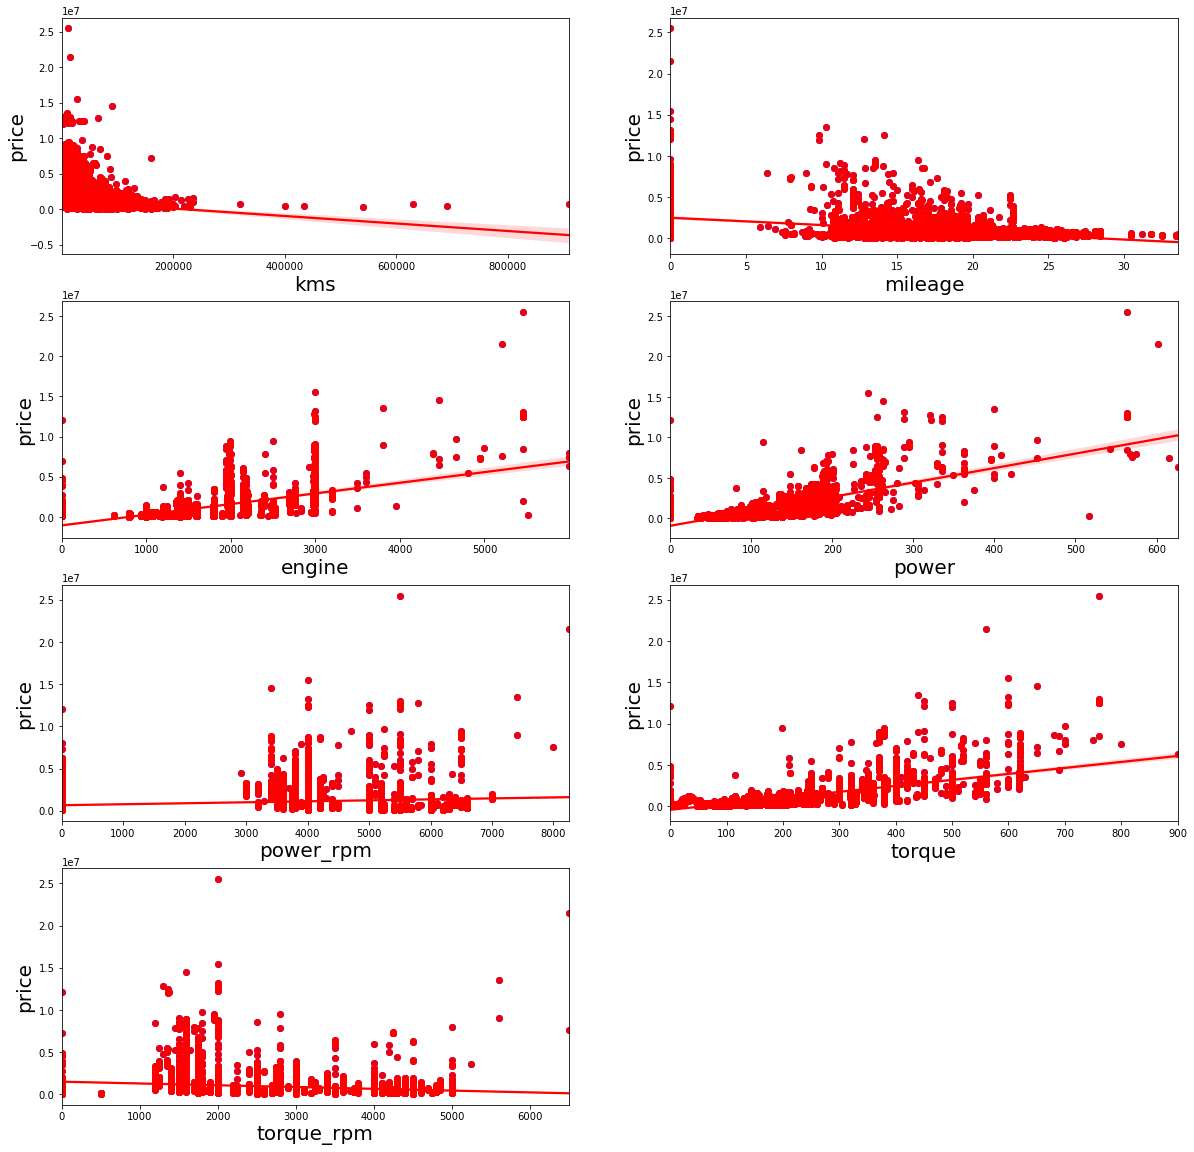

In [20]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in ['kms','mileage','engine','power','power_rpm','torque','torque_rpm']:
    if plotnumber<=len(['kms','mileage','engine','power','power_rpm','torque','torque_rpm']):
        ax=plt.subplot(4,2,plotnumber)
        plt.scatter(data[i],data['price'],color='purple')
        sn.regplot(data[i],data['price'],color='r')
        plt.xlabel(i,fontsize=20)
        plt.ylabel('price',fontsize=20)
    plotnumber+=1
plt.show()

### Columns having positive correlation with price are: torque, power, engine & power_rpm
### Columns having negative correlation with price are: kms, mileage & torque_rpm

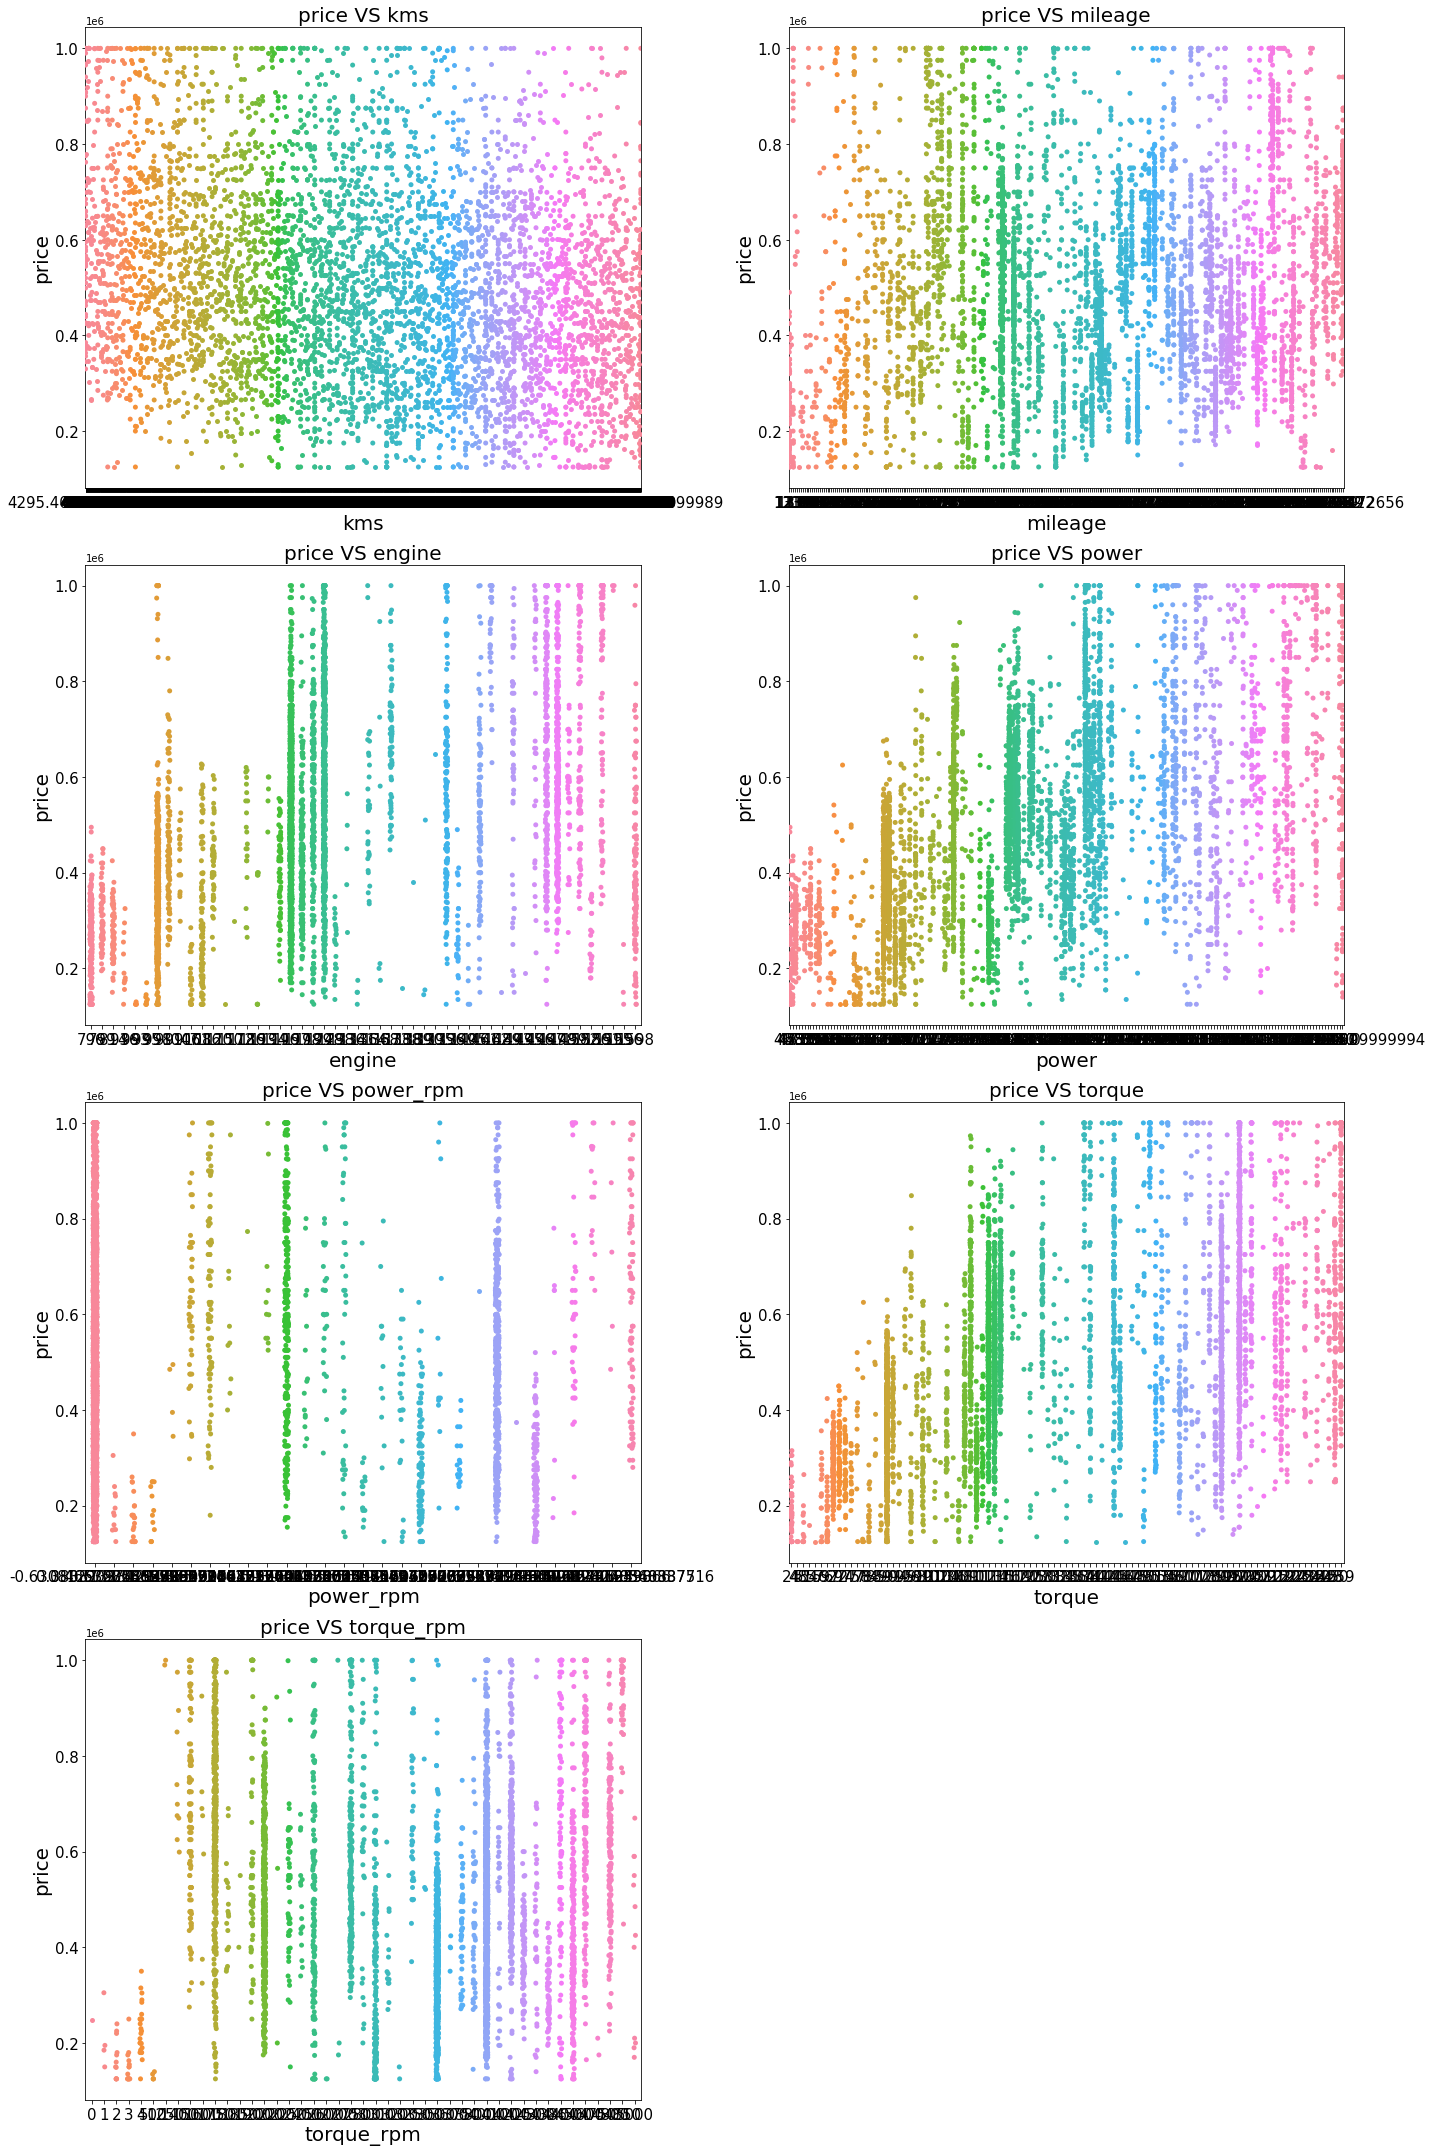

In [96]:
#stripplot for numerical columns
col1=['kms','mileage','engine','power','power_rpm','torque','torque_rpm']
plt.figure(figsize=(20,30))
for i in range(len(col1)):
    plt.subplot(4,2,i+1)
    sn.stripplot(x=data[col1[i]] , y=data['price'])
    plt.title(f"price VS {col1[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col1[i],fontsize = 20)
    plt.ylabel('price',fontsize = 20)
    plt.tight_layout()

## Observation:
### for higher value of torque and higher value of engine, price rate of car is higher

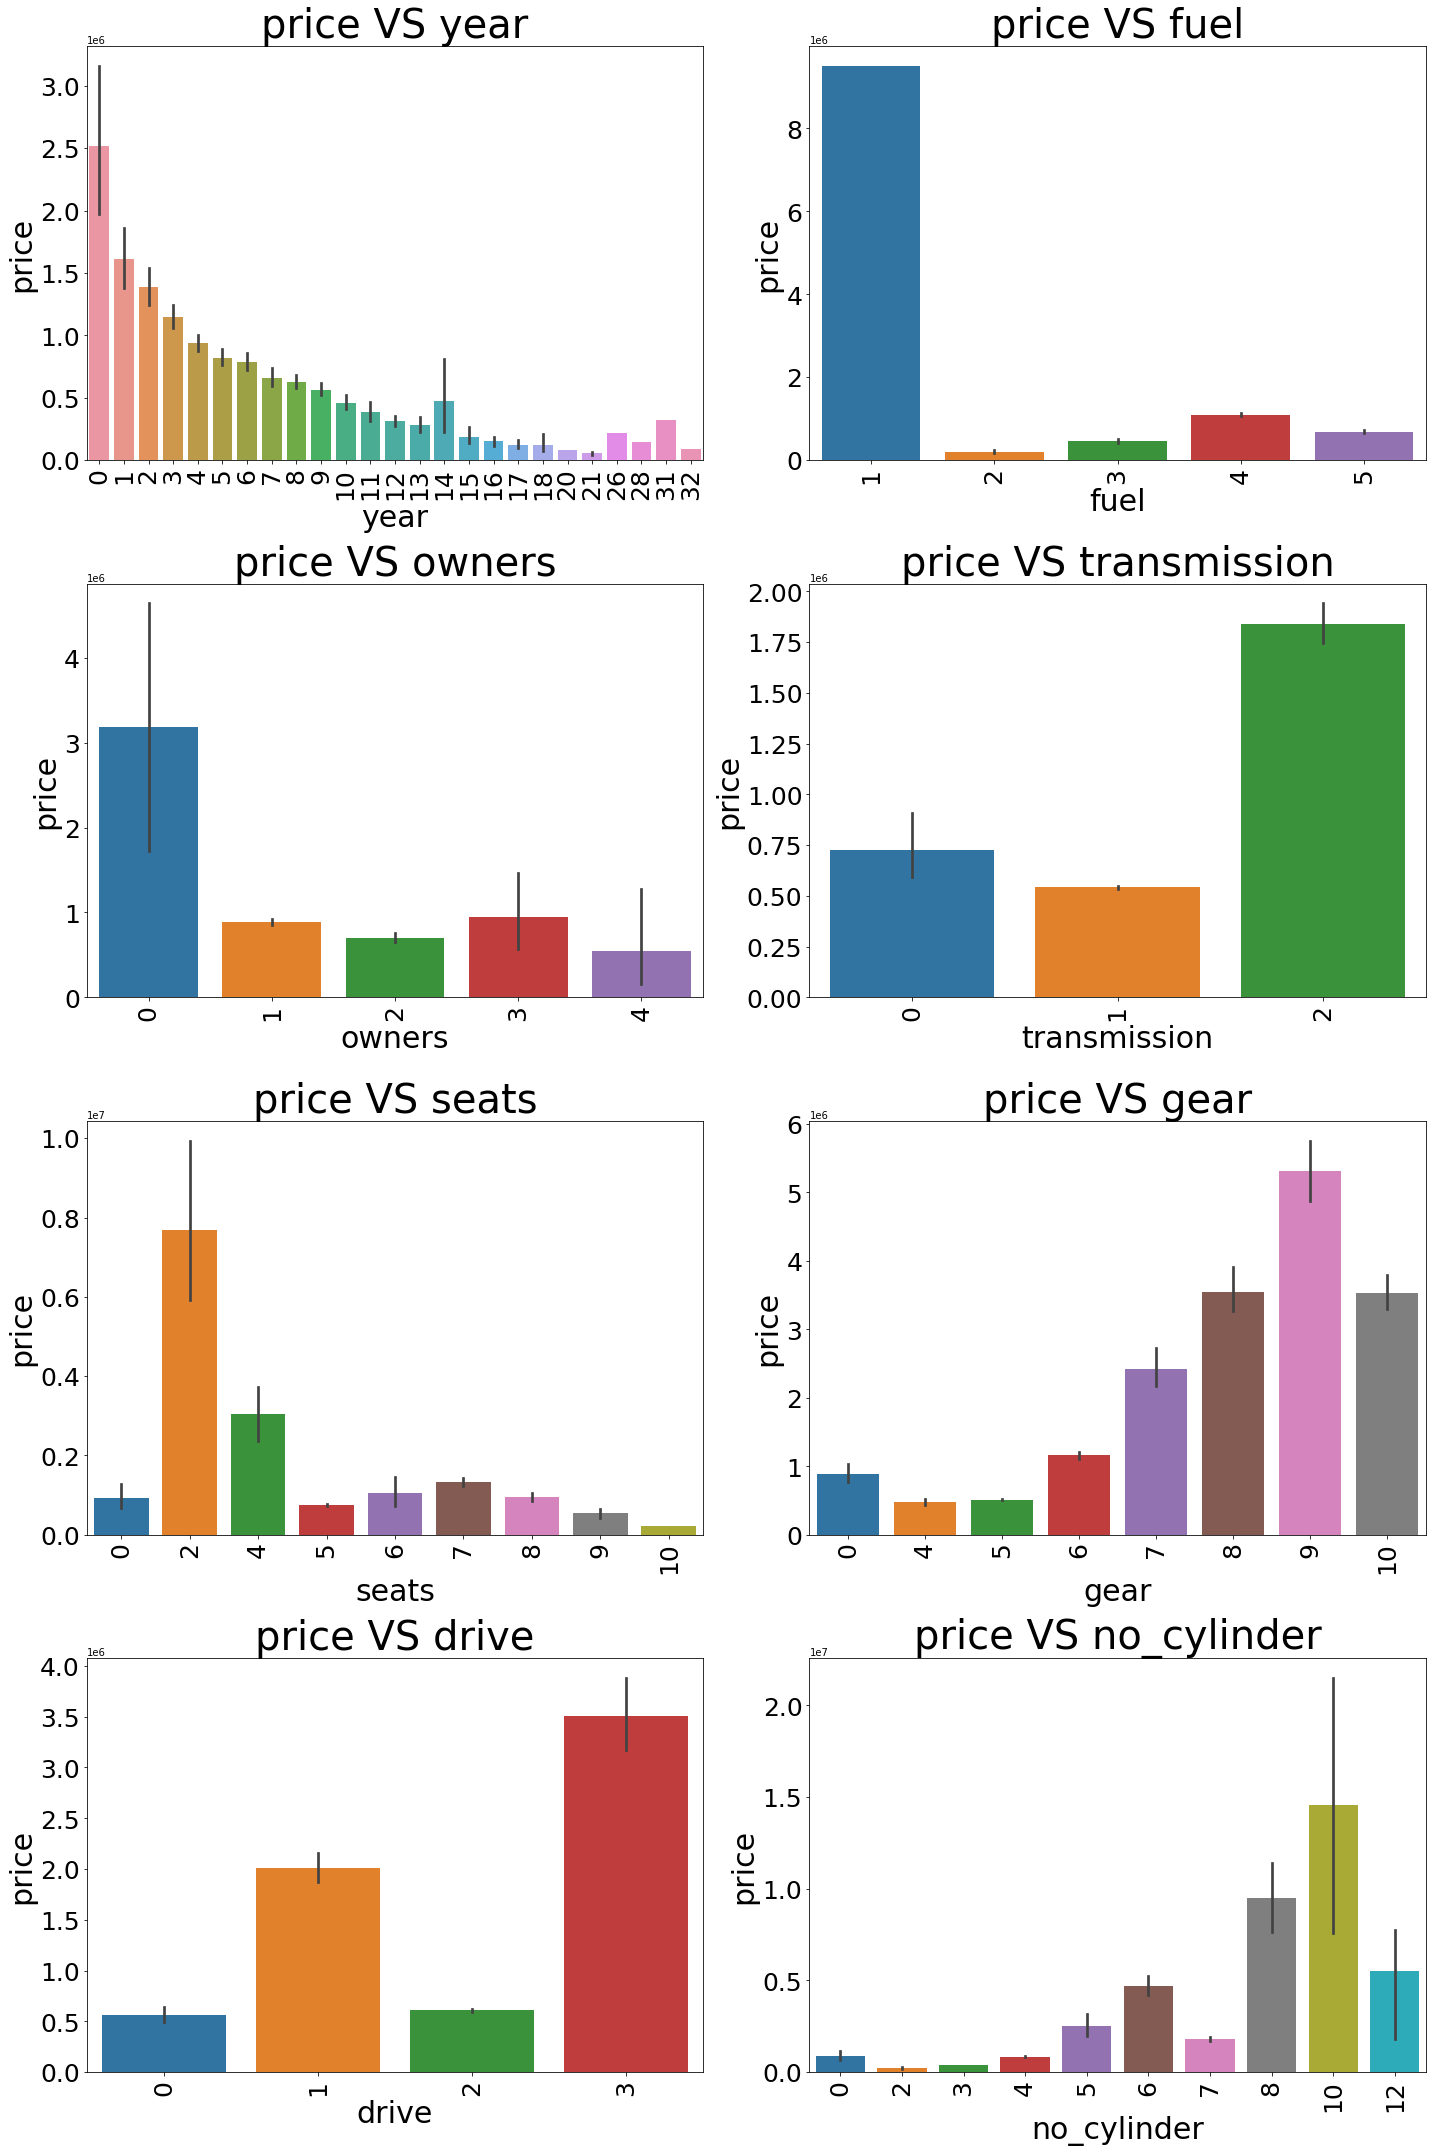

In [21]:
categorical_columns=['year','fuel','owners','transmission','seats','gear','drive','no_cylinder']
plt.figure(figsize=(20,30))
for i in range(len(categorical_columns)):
    plt.subplot(4,2,i+1)
    sn.barplot(y=data['price'],x=data[categorical_columns[i]])
    plt.title(f"price VS {categorical_columns[i]}",fontsize=40)
    plt.xticks(rotation=90,fontsize=25)  
    plt.yticks(rotation=0,fontsize=25)
    plt.xlabel(categorical_columns[i],fontsize = 30)
    plt.ylabel('price',fontsize = 30)
    plt.tight_layout()

### Observations:
- newer models of car have higher sell price
- cars having hybrid fuel type have higher sell price
- unregistered cars have higher sell price
- automatic transmission car have higher sell price
- 2 seater cars have highest sell price
- cars with more number of gear have higher sell price
- cars having all whell drive have higher sell price
- higher the number of cylinder of an engine in a car has higher sell price

### Check Outliers

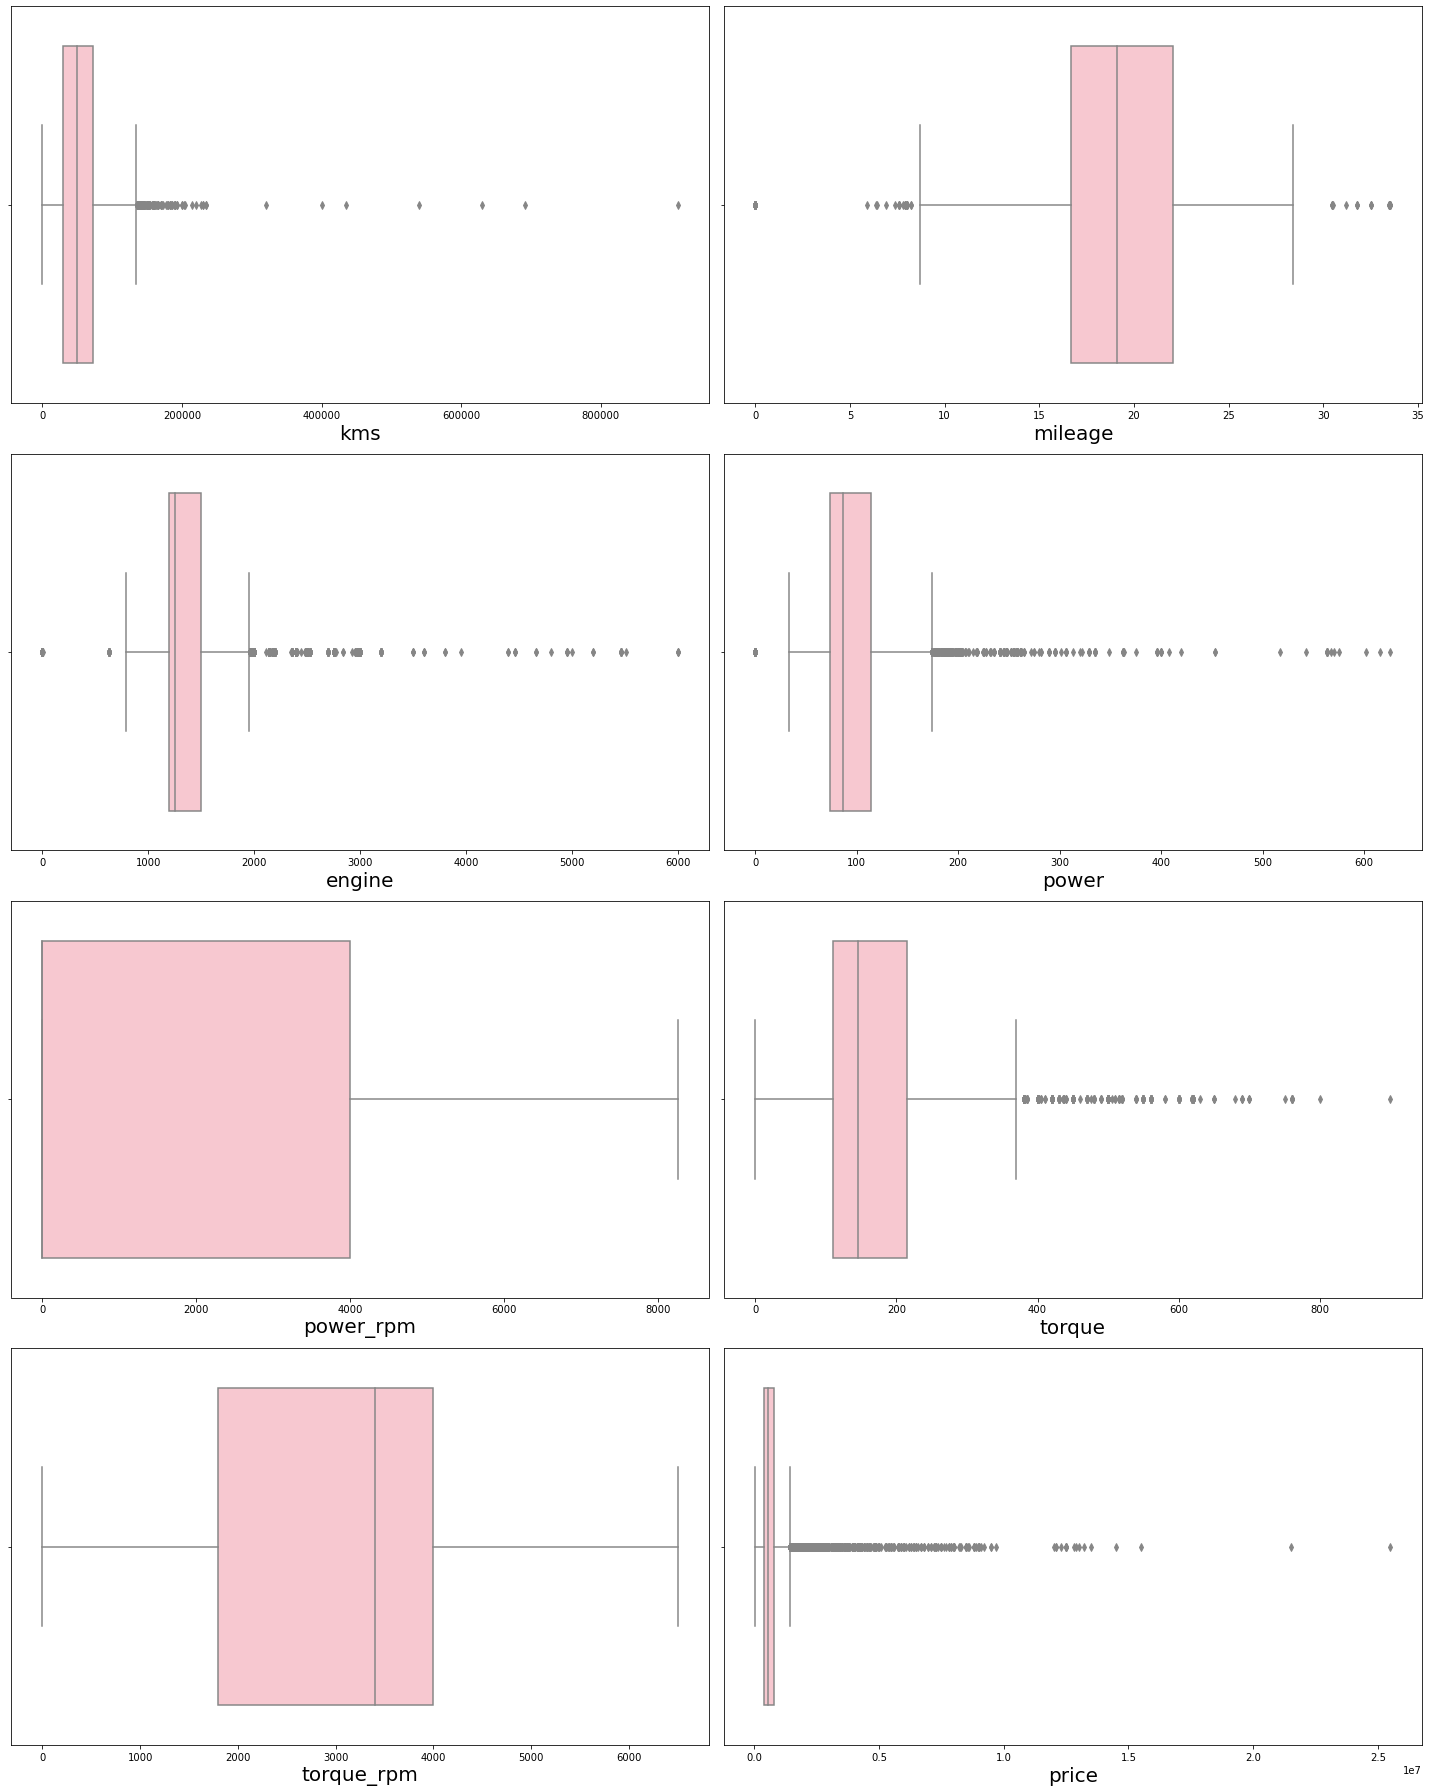

In [22]:
numerical_columns=['kms','mileage','engine','power','power_rpm','torque','torque_rpm','price']
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(4,2,plotnumber)
        sn.boxplot(data[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Outliers are present in column kms, mileage, engine, power, torque & price
### Remove them using Z-Score method

In [23]:
features=data[['kms','mileage','engine','power','torque','price']]
z=np.abs(zscore(features))
df=data[(z<3).all(axis=1)]
df

,year,fuel,kms,owners,transmission,mileage,engine,power,power_rpm,seats,gear,drive,torque,torque_rpm,no_cylinder,price
1,5,4,120000,1,1,28.09,1248,88.50,0,5,5,2,200,1750,4,700000
2,7,5,60000,2,1,16.51,1586,103.20,0,5,5,2,145,4100,4,315000
3,4,5,40000,1,1,21.21,1197,81.80,0,5,5,2,113,4200,4,580000
4,3,5,46000,1,1,23.10,998,67.04,0,5,5,2,90,3500,3,409999
5,1,4,4500,1,2,13.90,1996,167.62,0,7,10,1,420,2500,4,3500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,5,4,79000,1,1,24.80,1582,126.00,4000,5,6,2,260,1900,4,661000
9795,7,5,75000,1,1,16.80,1497,116.00,6600,5,5,2,146,4800,4,498000
9796,14,5,76000,1,2,13.90,1799,130.00,6300,5,5,2,171,4300,4,185000
9797,4,4,44000,1,1,22.27,1498,99.00,3750,5,5,2,205,1750,4,680000


### Our target is to achieve 5k data, hence remove as much as z score as possible untill data value doesnt fall below 5k data
### Check again for outliers and if present remove them again as much as possible

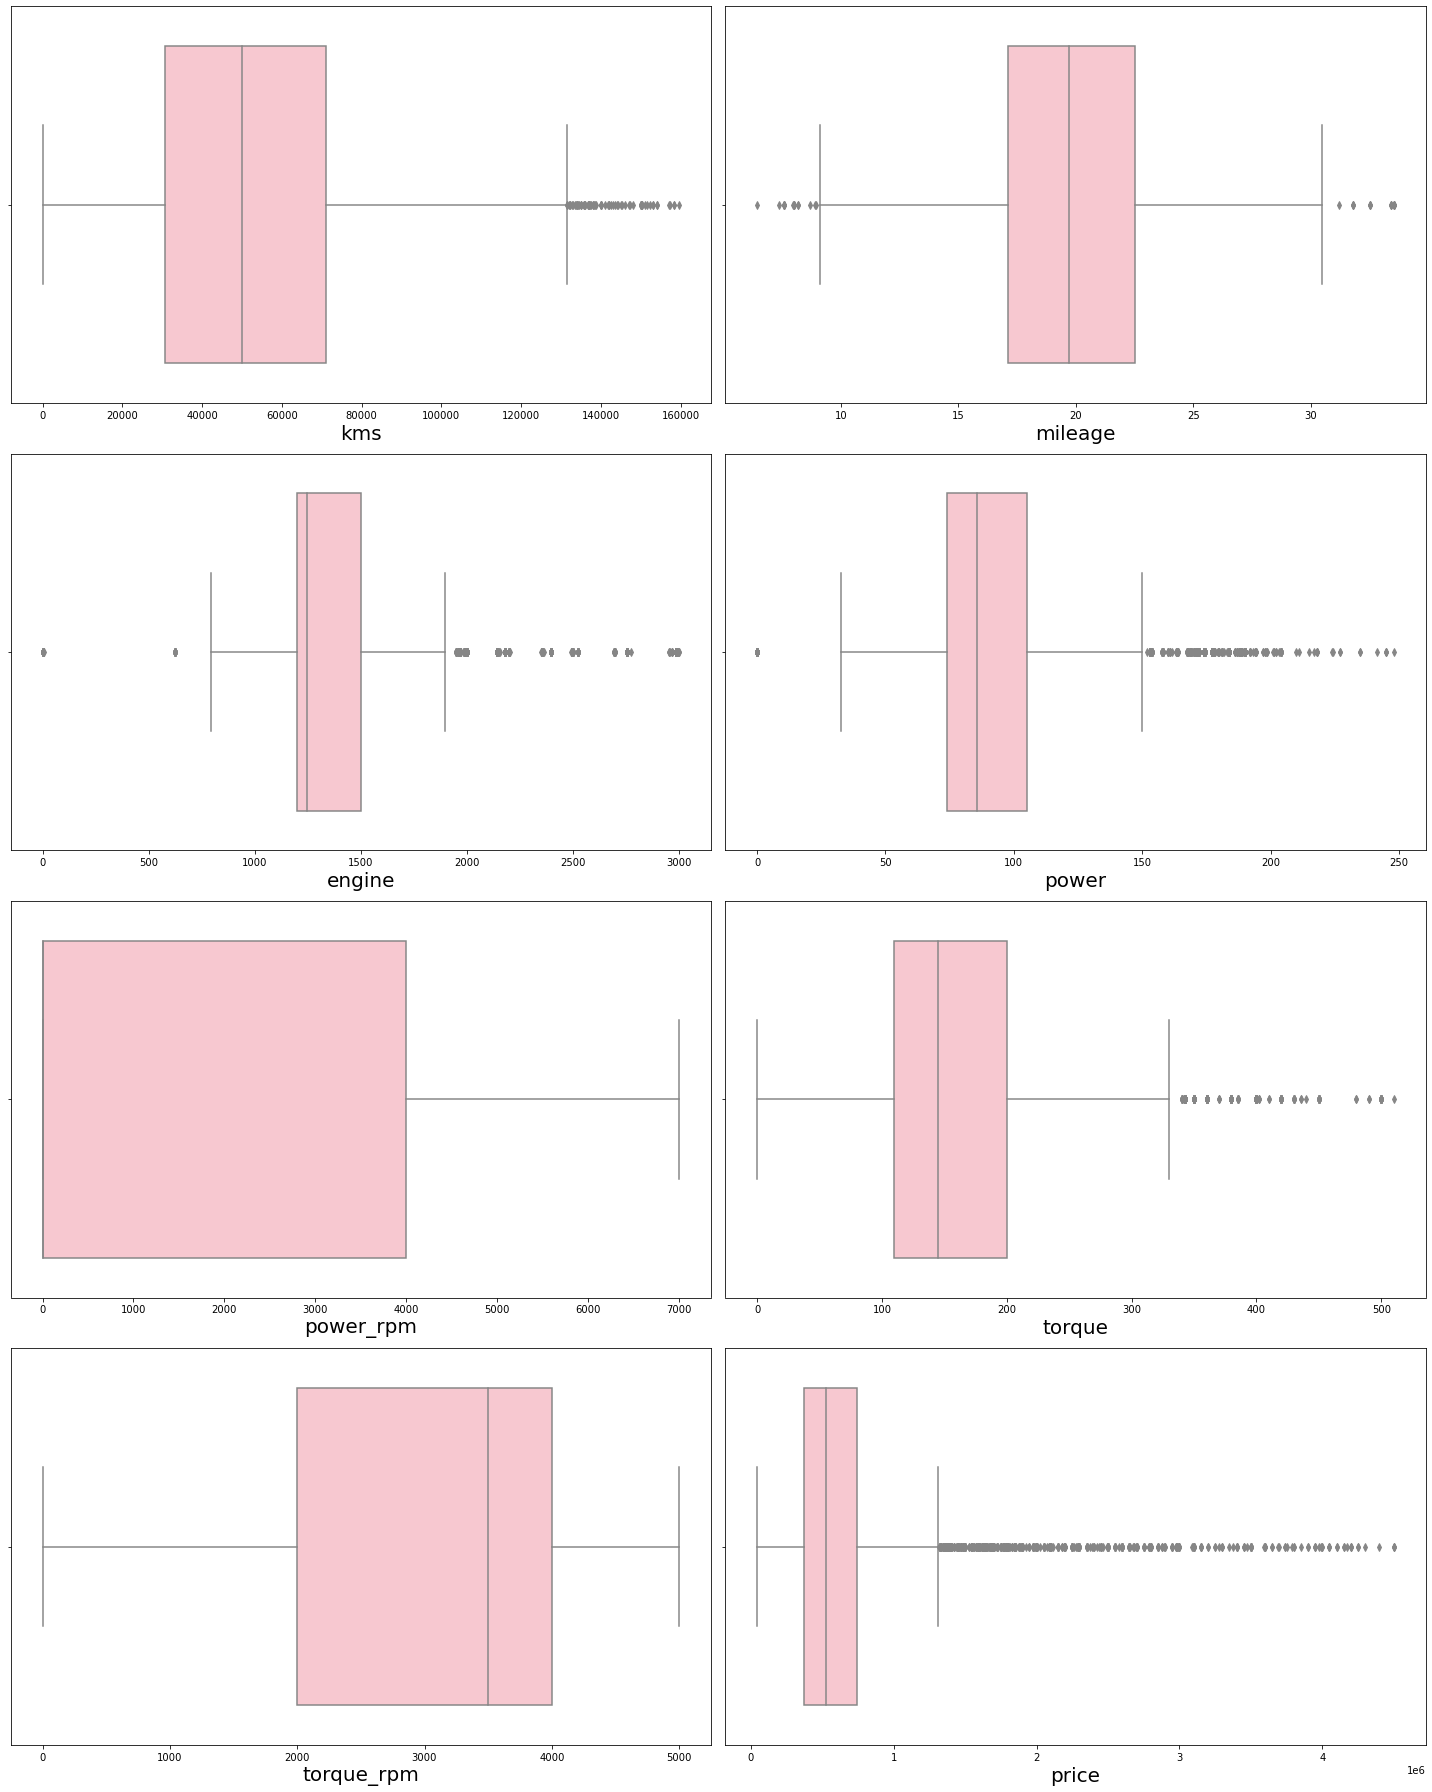

In [24]:
numerical_columns=['kms','mileage','engine','power','power_rpm','torque','torque_rpm','price']
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(4,2,plotnumber)
        sn.boxplot(df[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [25]:
features=df[['kms','mileage','engine','power','torque','price']]
z=np.abs(zscore(features))
data=df[(z<3).all(axis=1)]
data

,year,fuel,kms,owners,transmission,mileage,engine,power,power_rpm,seats,gear,drive,torque,torque_rpm,no_cylinder,price
1,5,4,120000,1,1,28.09,1248,88.50,0,5,5,2,200,1750,4,700000
2,7,5,60000,2,1,16.51,1586,103.20,0,5,5,2,145,4100,4,315000
3,4,5,40000,1,1,21.21,1197,81.80,0,5,5,2,113,4200,4,580000
4,3,5,46000,1,1,23.10,998,67.04,0,5,5,2,90,3500,3,409999
6,13,4,120000,3,1,12.05,2179,120.00,0,7,5,2,290,2800,4,350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,5,4,79000,1,1,24.80,1582,126.00,4000,5,6,2,260,1900,4,661000
9795,7,5,75000,1,1,16.80,1497,116.00,6600,5,5,2,146,4800,4,498000
9796,14,5,76000,1,2,13.90,1799,130.00,6300,5,5,2,171,4300,4,185000
9797,4,4,44000,1,1,22.27,1498,99.00,3750,5,5,2,205,1750,4,680000


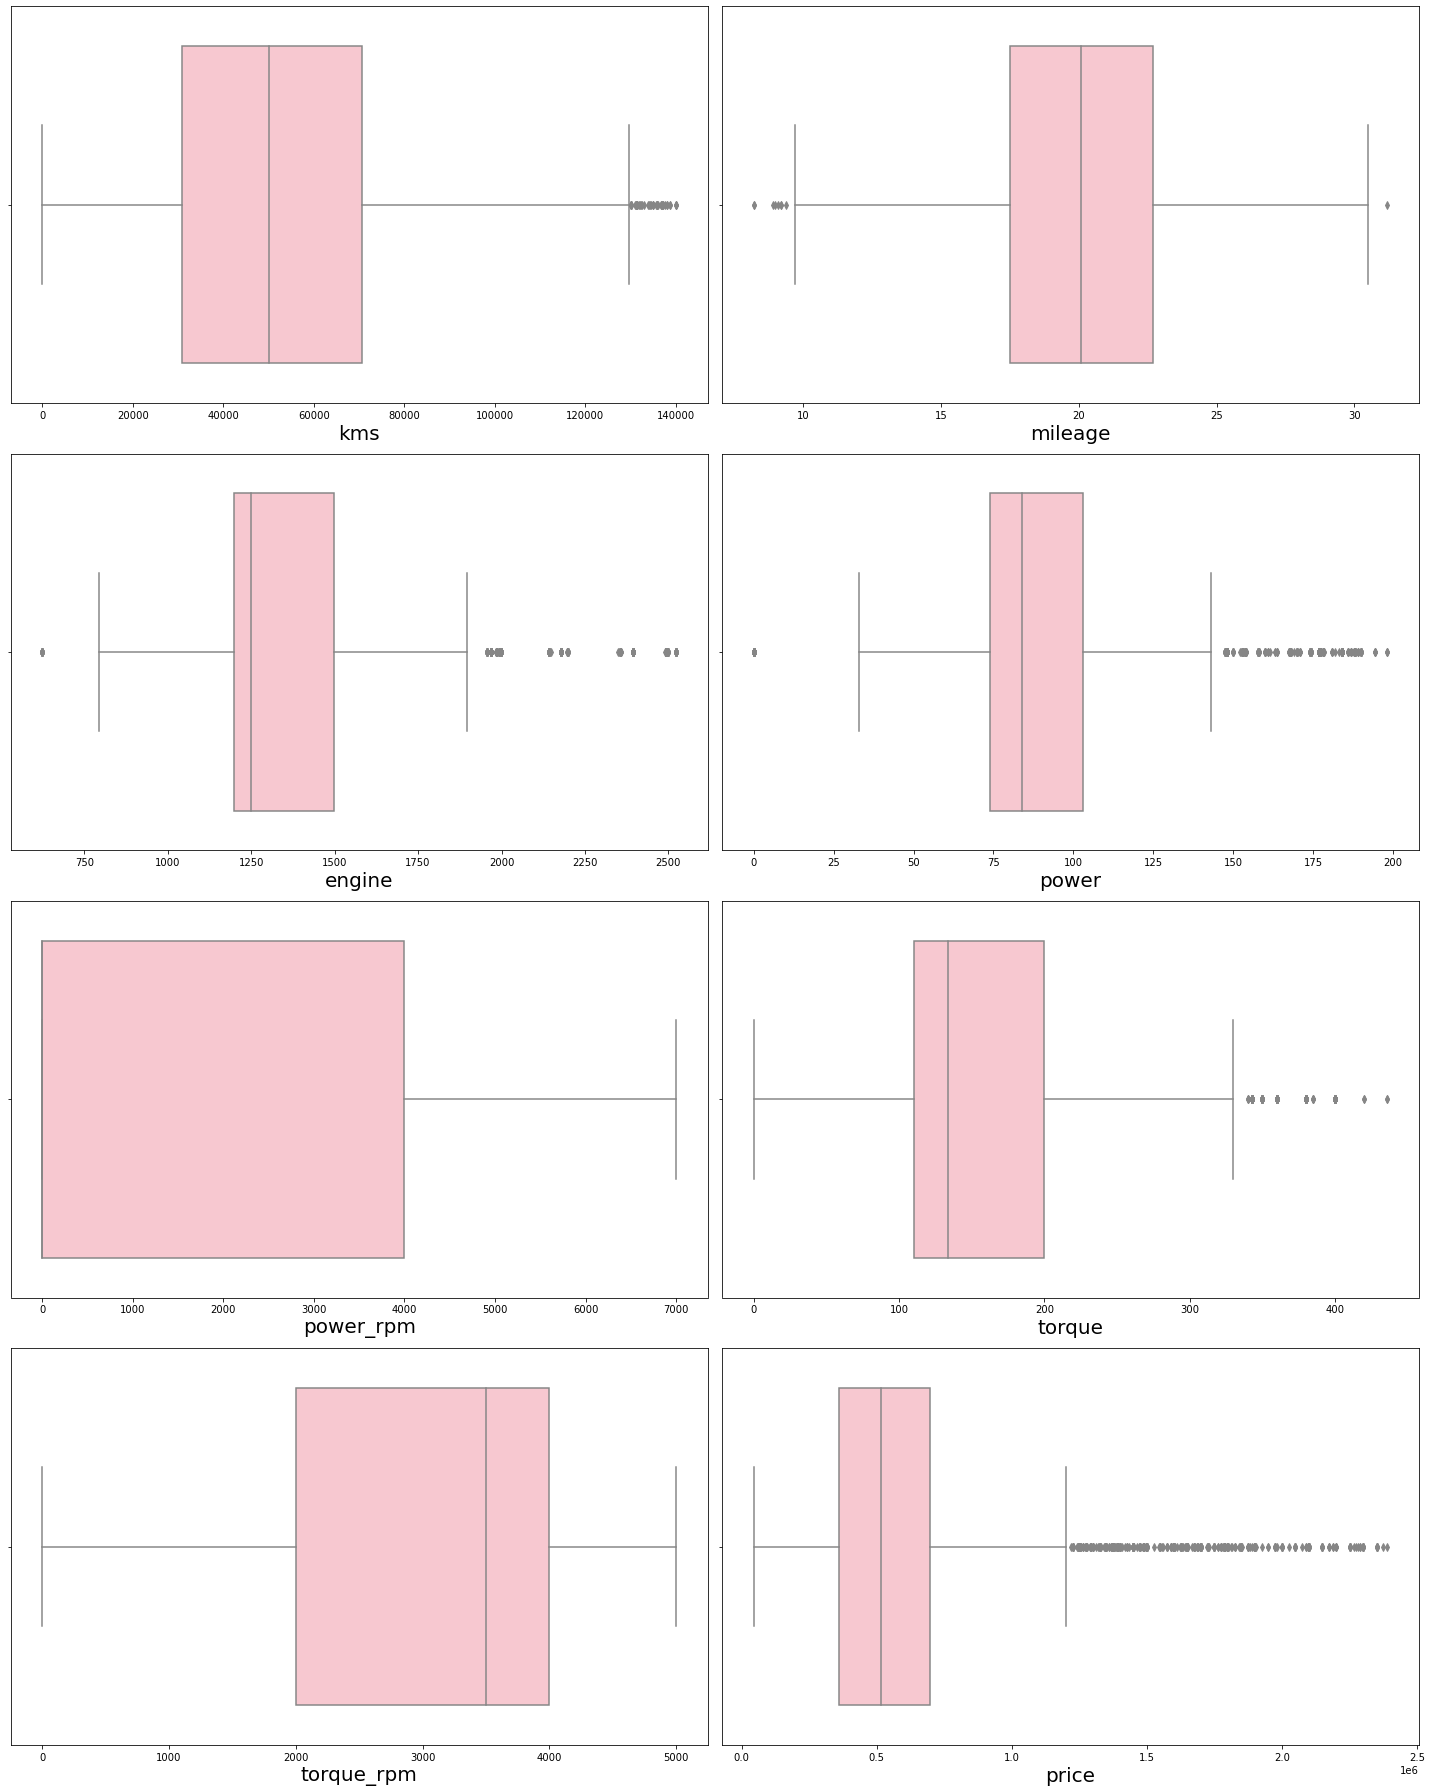

In [26]:
numerical_columns=['kms','mileage','engine','power','power_rpm','torque','torque_rpm','price']
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(4,2,plotnumber)
        sn.boxplot(data[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [27]:
for i in range(3): 
    features=data[['kms','mileage','engine','power','torque','price']]
    z=np.abs(zscore(features))
    df=data[(z<3).all(axis=1)]
    features=df[['kms','mileage','engine','power','torque','price']]
    z=np.abs(zscore(features))
    data=df[(z<3).all(axis=1)]
data

,year,fuel,kms,owners,transmission,mileage,engine,power,power_rpm,seats,gear,drive,torque,torque_rpm,no_cylinder,price
1,5,4,120000,1,1,28.09,1248,88.50,0,5,5,2,200,1750,4,700000
2,7,5,60000,2,1,16.51,1586,103.20,0,5,5,2,145,4100,4,315000
3,4,5,40000,1,1,21.21,1197,81.80,0,5,5,2,113,4200,4,580000
4,3,5,46000,1,1,23.10,998,67.04,0,5,5,2,90,3500,3,409999
7,6,5,62100,2,1,20.85,1197,83.14,0,5,5,2,115,4000,4,580000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,7,4,110000,1,1,23.40,1248,74.00,4000,5,5,2,190,2000,4,376000
9794,5,4,79000,1,1,24.80,1582,126.00,4000,5,6,2,260,1900,4,661000
9795,7,5,75000,1,1,16.80,1497,116.00,6600,5,5,2,146,4800,4,498000
9796,14,5,76000,1,2,13.90,1799,130.00,6300,5,5,2,171,4300,4,185000


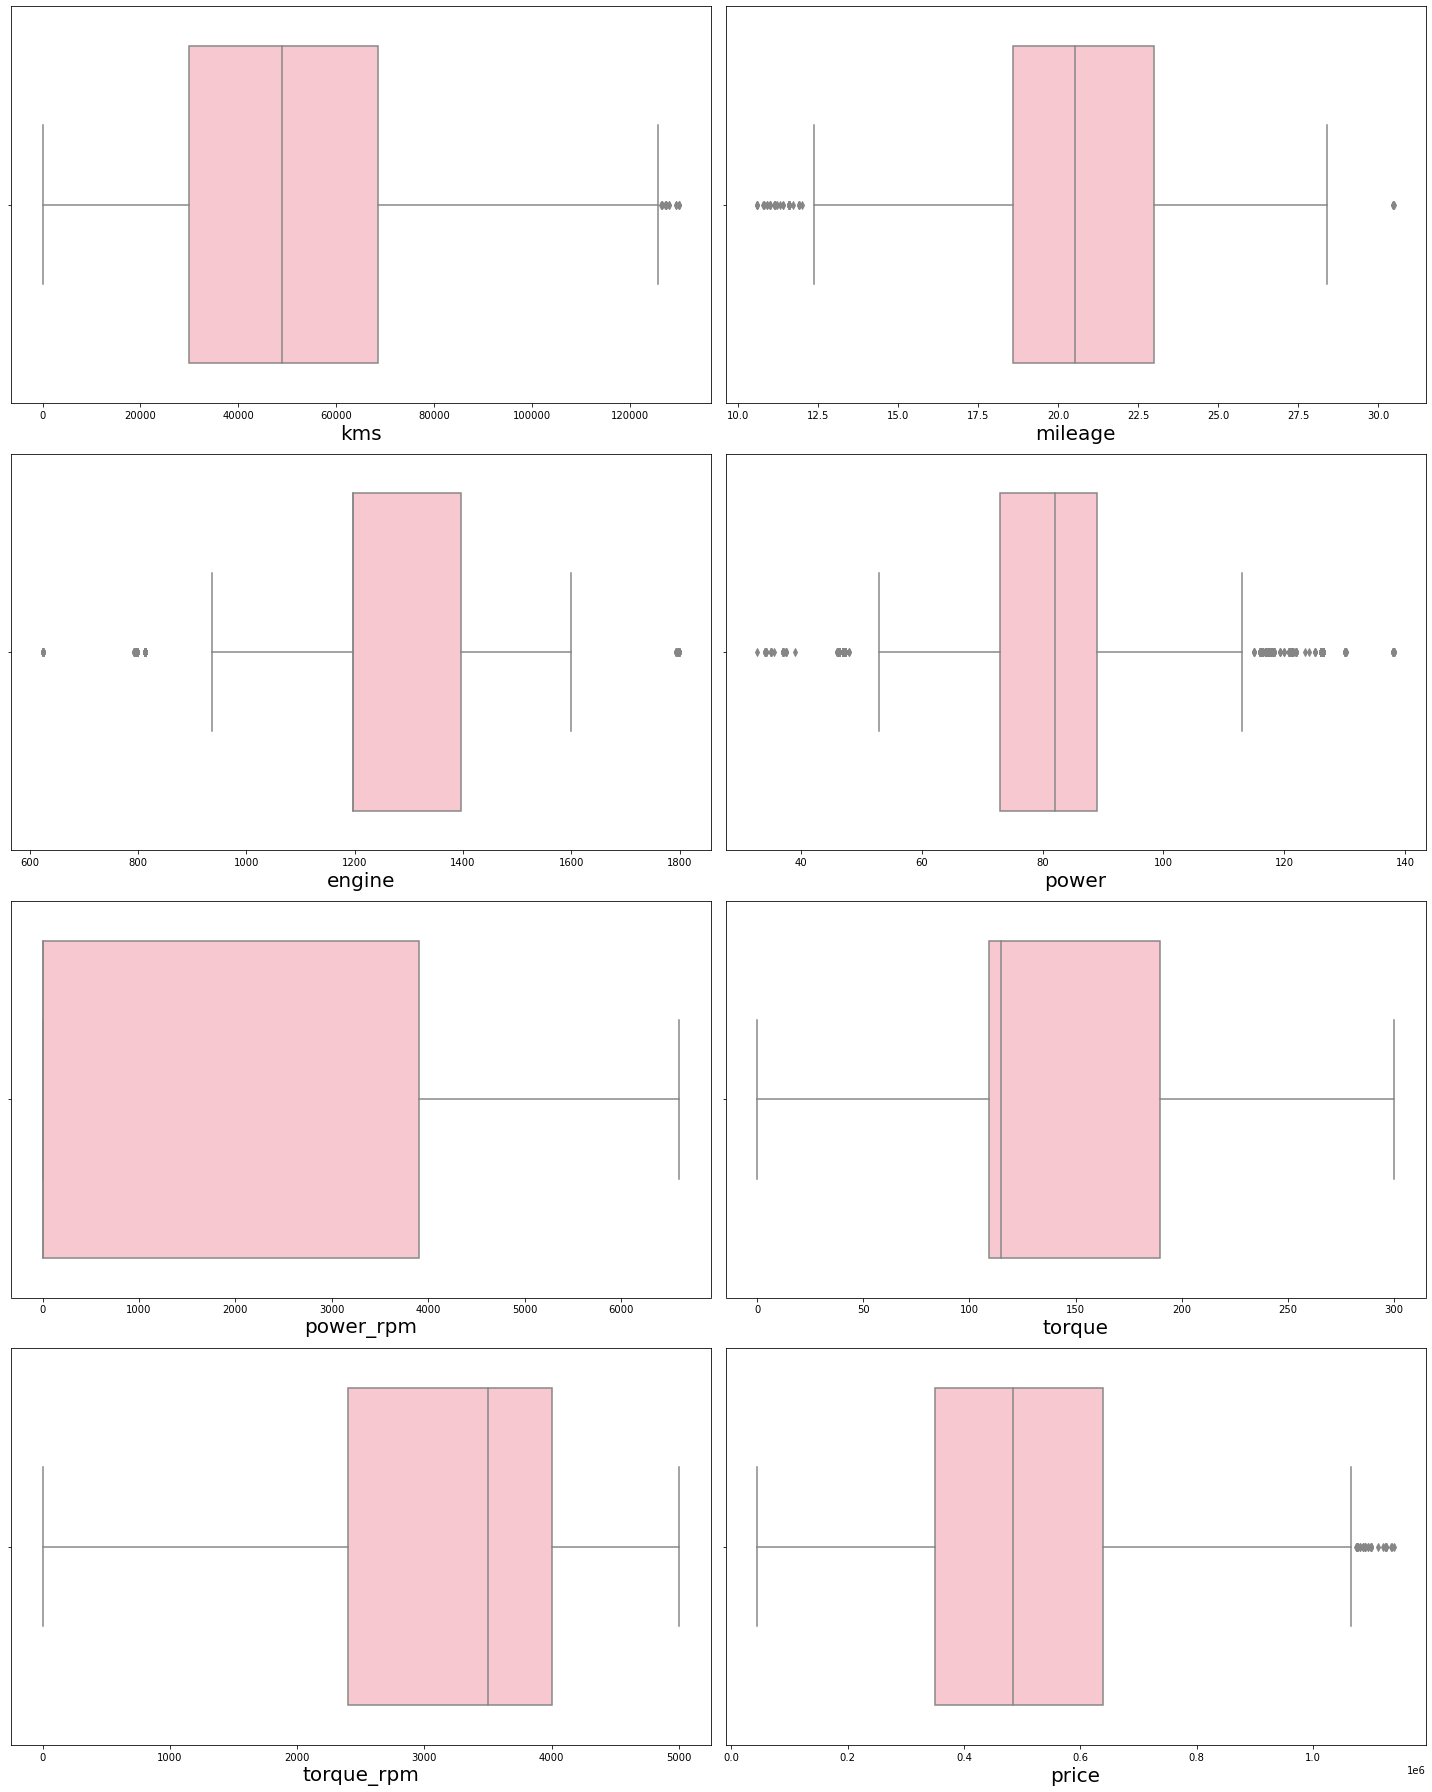

In [28]:
numerical_columns=['kms','mileage','engine','power','power_rpm','torque','torque_rpm','price']
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(4,2,plotnumber)
        sn.boxplot(data[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [29]:
features=['kms','mileage','engine','power','torque','price']
for col in features:
    if data[col].dtypes != 'object':
        percentile = data[col].quantile([0.01,0.98]).values
        data[col][data[col]<=percentile[0]]=percentile[0]
        data[col][data[col]>=percentile[1]]=percentile[1]

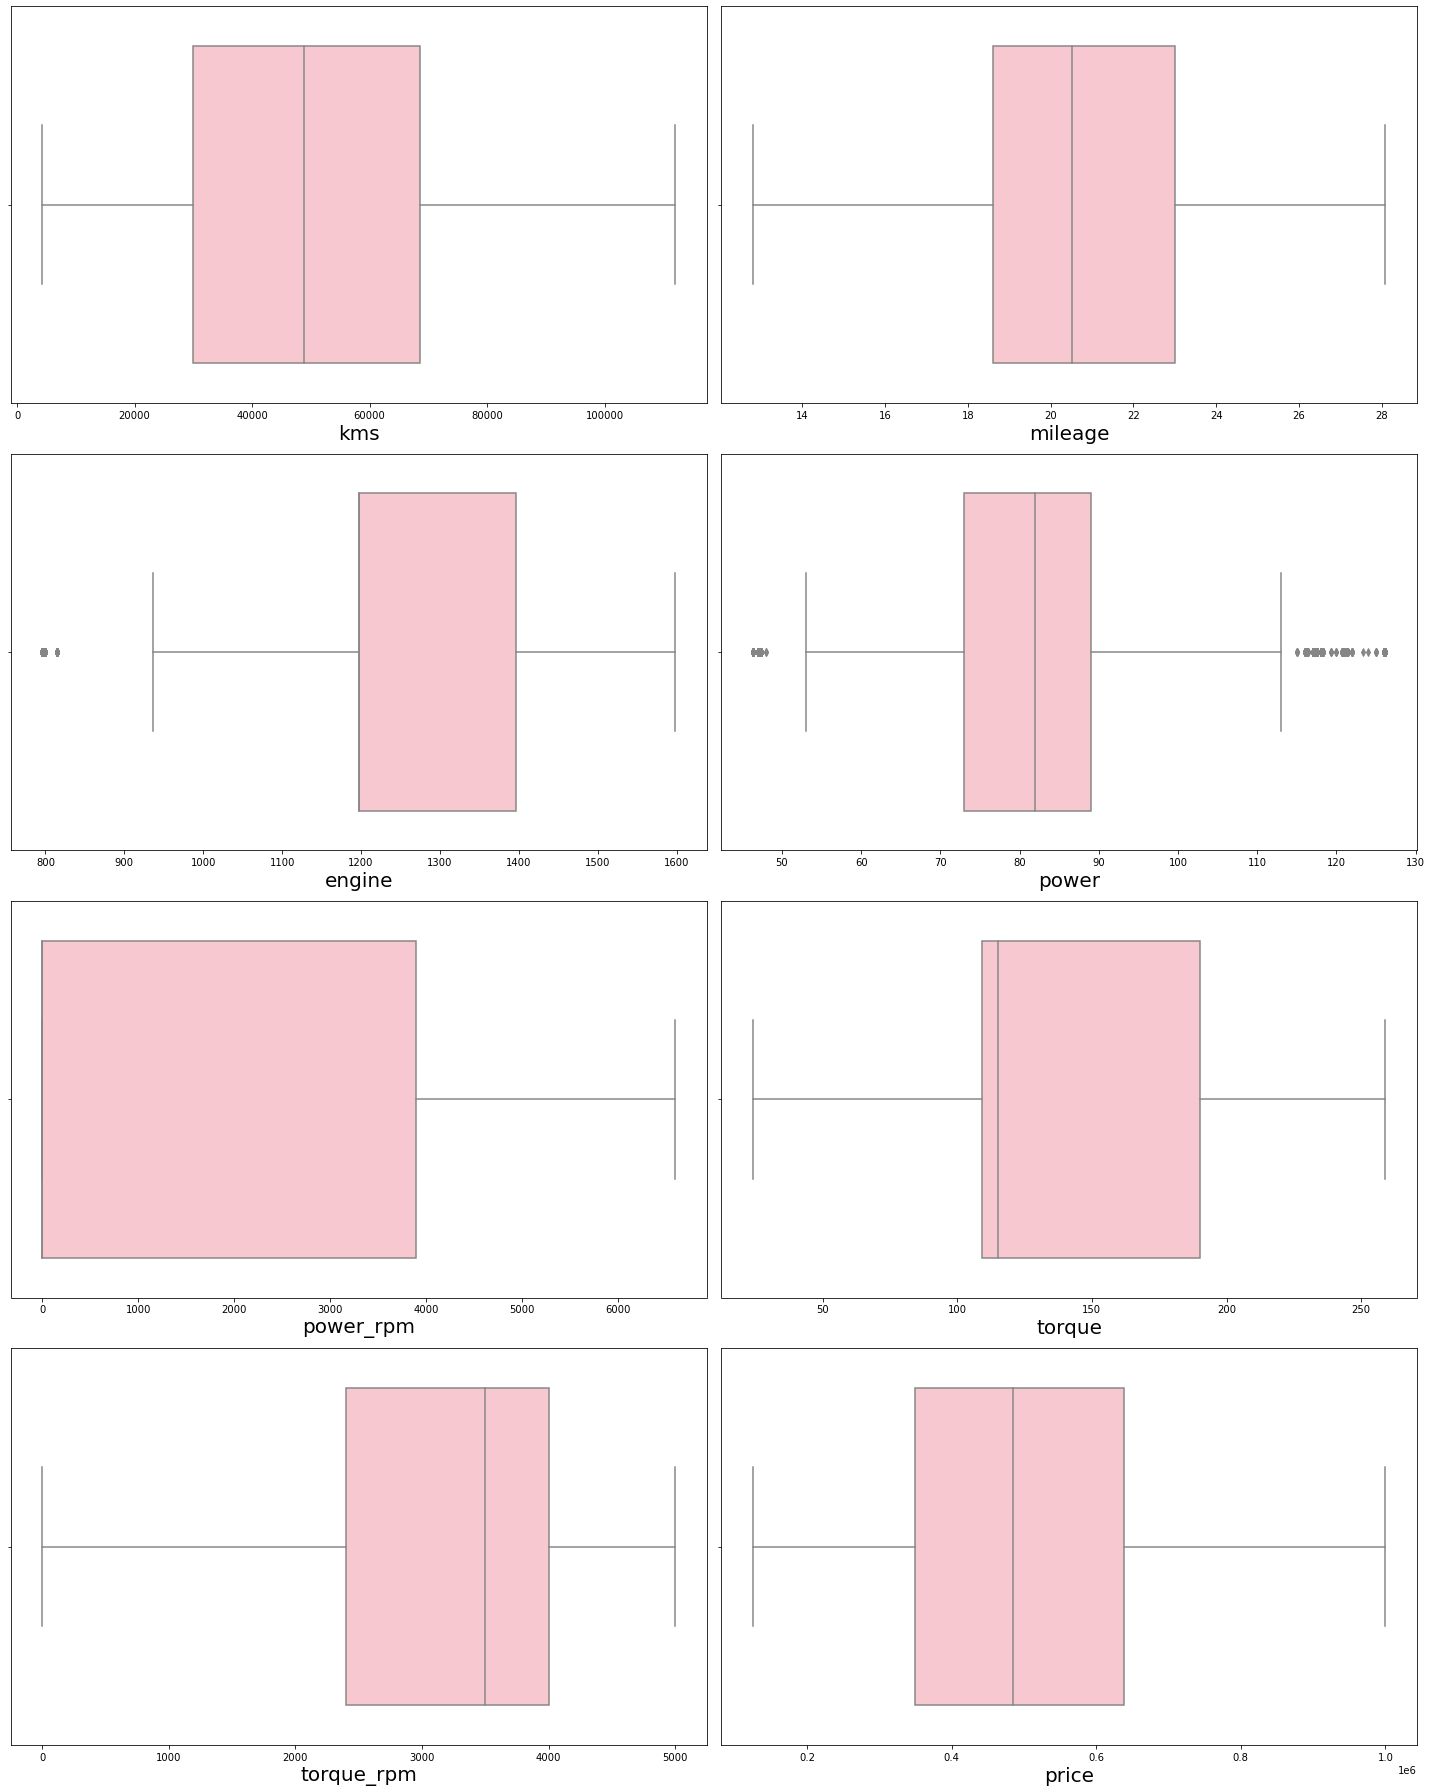

In [30]:
numerical_columns=['kms','mileage','engine','power','power_rpm','torque','torque_rpm','price']
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(4,2,plotnumber)
        sn.boxplot(data[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### As we can observe from above that outliers have been reduced to a greater extent
### Find the best features required to train the model

In [31]:
y = data[['price']]
x = data.drop(columns = ['price'],axis=1)

In [32]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))

           Specs         Score
2            kms  2.198481e+07
8      power_rpm  4.657543e+06
13    torque_rpm  4.062945e+05
6         engine  7.100136e+04
12        torque  4.358571e+04
7          power  9.295702e+03
0           year  5.049241e+03
5        mileage  7.234455e+02
3         owners  2.054948e+02
4   transmission  2.004639e+02
10          gear  1.665665e+02
11         drive  1.165804e+02
14   no_cylinder  1.086188e+02
1           fuel  7.340622e+01
9          seats  4.759980e+01


In [34]:
for i in range(len(featureScores)):
    featureScores['Score'].iloc[i]=int(featureScores.Score.values[i])

In [35]:
print(featureScores.nlargest(20,'Score'))

           Specs       Score
2            kms  21984814.0
8      power_rpm   4657543.0
13    torque_rpm    406294.0
6         engine     71001.0
12        torque     43585.0
7          power      9295.0
0           year      5049.0
5        mileage       723.0
3         owners       205.0
4   transmission       200.0
10          gear       166.0
11         drive       116.0
14   no_cylinder       108.0
1           fuel        73.0
9          seats        47.0


### Drop feature seats and fuel as they have the least importance with regards to target variable

In [36]:
data=data.drop(['seats','fuel'],axis=1)
data

,year,kms,owners,transmission,mileage,engine,power,power_rpm,gear,drive,torque,torque_rpm,no_cylinder,price
1,5,111968.8,1,1,28.09,1248,88.50,0,5,2,200,1750,4,700000
2,7,60000.0,2,1,16.51,1586,103.20,0,5,2,145,4100,4,315000
3,4,40000.0,1,1,21.21,1197,81.80,0,5,2,113,4200,4,580000
4,3,46000.0,1,1,23.10,998,67.04,0,5,2,90,3500,3,409999
7,6,62100.0,2,1,20.85,1197,83.14,0,5,2,115,4000,4,580000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,7,110000.0,1,1,23.40,1248,74.00,4000,5,2,190,2000,4,376000
9794,5,79000.0,1,1,24.80,1582,126.00,4000,6,2,259,1900,4,661000
9795,7,75000.0,1,1,16.80,1497,116.00,6600,5,2,146,4800,4,498000
9796,14,76000.0,1,2,13.90,1598,126.18,6300,5,2,171,4300,4,185000


### Check for skewness and try to reduce it

In [37]:
#data.skew()
numerical=['kms','mileage','engine','power','power_rpm','torque','torque_rpm','price']
print(data[numerical].skew())
print(len(data[numerical].skew().loc[data[numerical].skew()>0.55]))

kms           0.321992
mileage       0.069566
engine       -0.135959
power         0.380536
power_rpm     1.141089
torque        0.505762
torque_rpm   -0.650511
price         0.444821
dtype: float64
1


In [38]:
scaler = PowerTransformer(method='yeo-johnson',standardize=True)
#applying Power Transformation method for this particular column
data['power_rpm'] = scaler.fit_transform(data[['power_rpm']])

In [39]:
numerical=['kms','mileage','engine','power','power_rpm','torque','torque_rpm','price']
print(data[numerical].skew())
print(len(data[numerical].skew().loc[data[numerical].skew()>0.55]))

kms           0.321992
mileage       0.069566
engine       -0.135959
power         0.380536
power_rpm     0.966809
torque        0.505762
torque_rpm   -0.650511
price         0.444821
dtype: float64
1


### Check for column correlation w.r.t price column

In [40]:
cor=data.corr()
cor['price']

year           -0.660278
kms            -0.239504
owners         -0.254753
transmission    0.196245
mileage         0.113297
engine          0.455567
power           0.536273
power_rpm       0.038345
gear            0.070776
drive           0.152568
torque          0.472263
torque_rpm     -0.075657
no_cylinder     0.353864
price           1.000000
Name: price, dtype: float64

### visualize of column correlation

<AxesSubplot:>

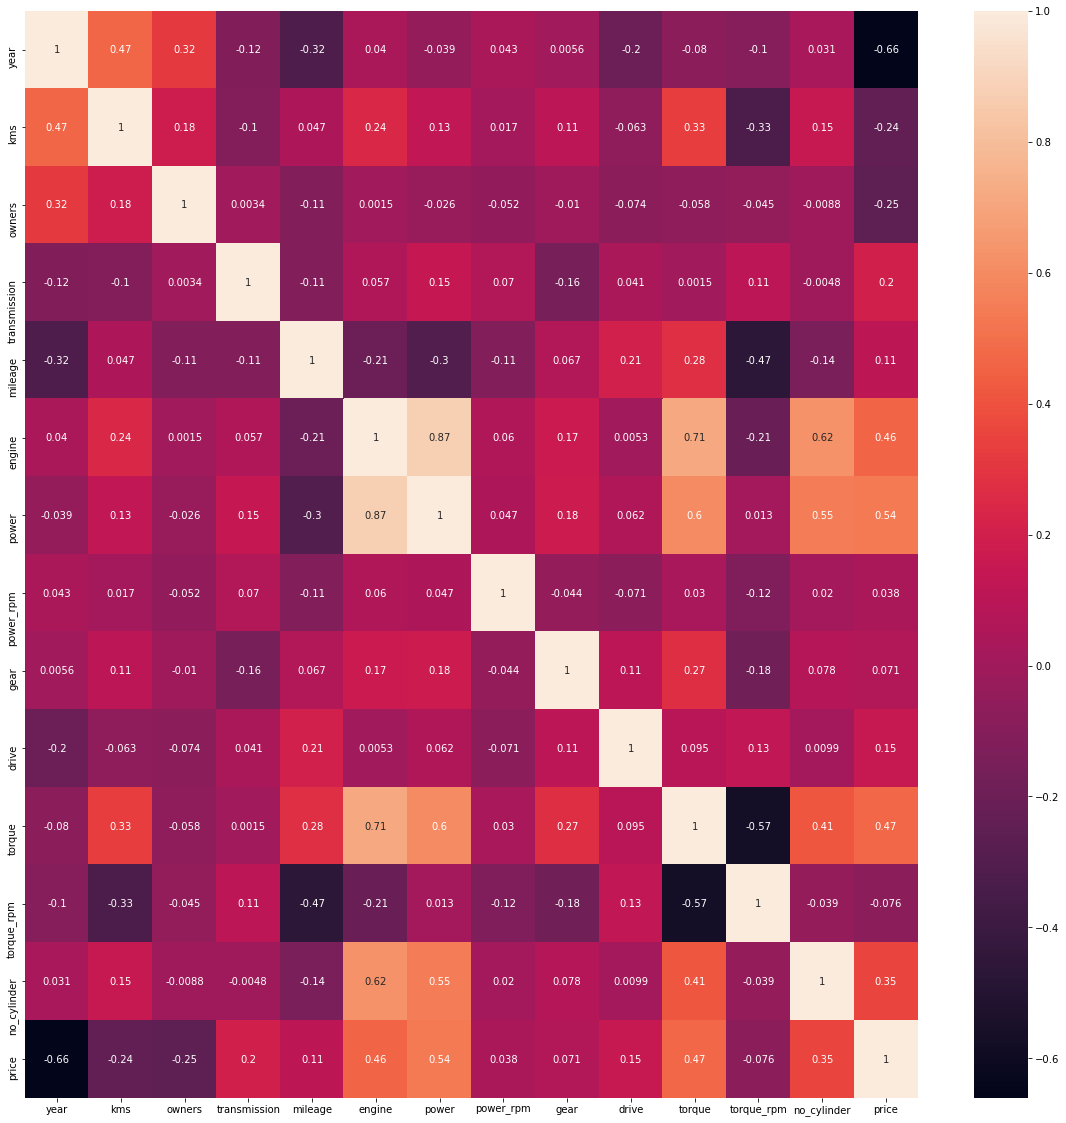

In [41]:
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(data.corr(),annot=True,ax=ax)

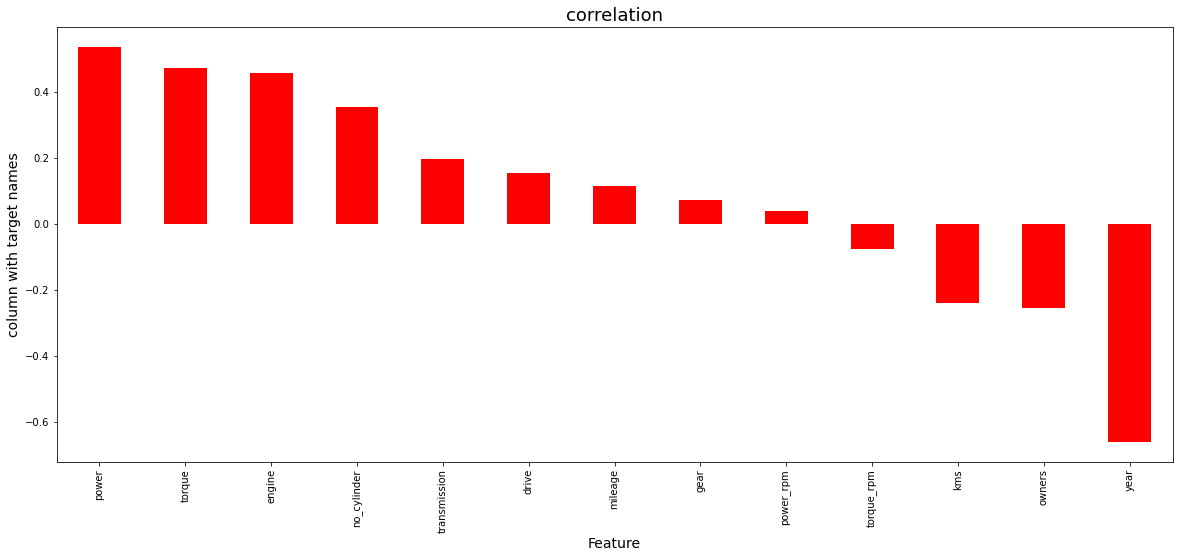

In [44]:
plt.figure(figsize=(20,8))
data.corr()['price'].sort_values(ascending=False).drop(['price']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### We can analyze that column gear, power_rpm & torque_rpm have least correlation, but we will not drop them for now and analyze further

In [42]:
y = data[['price']]
x = data.drop(columns = ['price'],axis=1)

### Feature Scaling

In [45]:
scaler =StandardScaler()
x[['kms','mileage','engine','power','power_rpm','torque','torque_rpm']]= scaler.fit_transform(x[['kms','mileage','engine','power','power_rpm','torque','torque_rpm']])

### Check for multicolinearity issue in dataset using VIF:

In [46]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,8.668412,year
1,1.573318,kms
2,9.924319,owners
3,9.629034,transmission
4,2.414966,mileage
5,6.855390,engine
6,5.961532,power
7,1.078978,power_rpm
8,32.520693,gear
9,24.194473,drive


### We have to drop column with highest vif untill no column has vif higher than 10

In [47]:
x=x.drop(['no_cylinder'],axis=1)
x

,year,kms,owners,transmission,mileage,engine,power,power_rpm,gear,drive,torque,torque_rpm
1,5,2.356948,1,1,2.224570,0.064664,0.266632,-0.630813,5,2,1.118257,-1.486803
2,7,0.367865,2,1,-1.241376,1.726906,1.092741,-0.630813,5,2,0.076250,0.741443
3,4,-0.397626,1,1,0.165355,-0.186147,-0.109893,-0.630813,5,2,-0.530009,0.836262
4,3,-0.167979,1,1,0.731040,-1.164804,-0.939374,-0.630813,5,2,-0.965758,0.172529
7,6,0.448241,2,1,0.057605,-0.186147,-0.034588,-0.630813,5,2,-0.492118,0.646624
...,...,...,...,...,...,...,...,...,...,...,...,...
9791,7,2.281593,1,1,0.820832,0.064664,-0.548237,1.591812,5,2,0.928801,-1.249755
9794,5,1.095081,1,1,1.239858,1.707234,2.374052,1.591812,6,2,2.236047,-1.344574
9795,7,0.941983,1,1,-1.154578,1.289215,1.812074,1.612404,5,2,0.095195,1.405176
9796,14,0.980258,1,2,-2.022561,1.785920,2.384168,1.610640,5,2,0.568835,0.931081


In [48]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,8.278448,year
1,1.557866,kms
2,9.613062,owners
3,8.711811,transmission
4,2.402271,mileage
5,6.174451,engine
6,5.890179,power
7,1.077309,power_rpm
8,22.604436,gear
9,21.296972,drive


In [49]:
x=x.drop(['gear'],axis=1)
x

,year,kms,owners,transmission,mileage,engine,power,power_rpm,drive,torque,torque_rpm
1,5,2.356948,1,1,2.224570,0.064664,0.266632,-0.630813,2,1.118257,-1.486803
2,7,0.367865,2,1,-1.241376,1.726906,1.092741,-0.630813,2,0.076250,0.741443
3,4,-0.397626,1,1,0.165355,-0.186147,-0.109893,-0.630813,2,-0.530009,0.836262
4,3,-0.167979,1,1,0.731040,-1.164804,-0.939374,-0.630813,2,-0.965758,0.172529
7,6,0.448241,2,1,0.057605,-0.186147,-0.034588,-0.630813,2,-0.492118,0.646624
...,...,...,...,...,...,...,...,...,...,...,...
9791,7,2.281593,1,1,0.820832,0.064664,-0.548237,1.591812,2,0.928801,-1.249755
9794,5,1.095081,1,1,1.239858,1.707234,2.374052,1.591812,2,2.236047,-1.344574
9795,7,0.941983,1,1,-1.154578,1.289215,1.812074,1.612404,2,0.095195,1.405176
9796,14,0.980258,1,2,-2.022561,1.785920,2.384168,1.610640,2,0.568835,0.931081


In [50]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,7.778511,year
1,1.534422,kms
2,9.133911,owners
3,8.456084,transmission
4,2.398313,mileage
5,6.156250,engine
6,5.877033,power
7,1.075909,power_rpm
8,12.920121,drive
9,4.720575,torque


In [51]:
x=x.drop(['drive'],axis=1)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,6.842226,year
1,1.472012,kms
2,7.939450,owners
3,6.036643,transmission
4,2.130082,mileage
5,6.156087,engine
6,5.876604,power
7,1.075390,power_rpm
8,4.594719,torque
9,2.431325,torque_rpm


### Vif removed
### model building
below is the code to find best random state to split dataset into train and test for a specific model

In [52]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

Below are all the models through which we need to iterate through to find the best model

In [53]:
models=[GradientBoostingRegressor(),NuSVR(),LinearRegression(),Ridge(),RidgeCV(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),LinearSVR(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),LGBMRegressor(), XGBRFRegressor(),XGBRegressor(),LogisticRegression(),ExtraTreesRegressor()]

Below is the code to iterate all the models, train them and display their acc

In [54]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2',n_jobs=-1)
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

**********
GradientBoostingRegressor()
score 0.8424558505108128
r2 0.8622766095309222
diff 0.01982075902010938
mae 63278.58955186039
rmse 80947.02353909692
**********
NuSVR()
score -0.004731141159717978
r2 -0.009360837122406984
diff 0.004629695962689006
mae 175720.56564675257
rmse 219139.29315731596
**********
LinearRegression()
score 0.7225565573895067
r2 0.7563318526971075
diff 0.033775295307600706
mae 85383.14617573918
rmse 107670.42119484913
**********
Ridge()
score 0.7225603554940822
r2 0.7563320207023372
diff 0.03377166520825503
mae 85383.24326600101
rmse 107670.38407633947
**********
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
score 0.7225844364477738
r2 0.7563267446531494
diff 0.033742308205375604
mae 85384.21058373456
rmse 107671.54974277016
**********
BayesianRidge()
score 0.7225718477816123
r2 0.7563278585619009
diff 0.03375601078028856
mae 85384.10066463493
rmse 107671.30364186254
**********
SGDRegressor()
score 0.718552759281034
r2 0.7562275922676522
diff 0.03767483298661822

### there are 2 best models:
LogisticRegression and LGBMRegressor
cross verify to check if the model is not been overfitted or is throwing incorrect acc

### Hyper tune models

In [56]:
parameters ={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'C' : np.logspace(-4, 4, 20),
             'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],'max_iter' : [100, 1000,2500, 5000]}
clf = RandomizedSearchCV(LogisticRegression(), parameters, cv=10,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 49.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 65.9min finished


{'solver': 'newton-cg',
 'penalty': 'l2',
 'max_iter': 1000,
 'C': 0.0006951927961775605}

In [57]:
parameters={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
clf = RandomizedSearchCV(LGBMRegressor(), parameters, cv=10,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished


{'colsample_bytree': 0.5684698759566209,
 'min_child_samples': 205,
 'min_child_weight': 10.0,
 'num_leaves': 21,
 'reg_alpha': 10,
 'reg_lambda': 5,
 'subsample': 0.2937104302587951}

### find the best random state to split the data for both these models

In [60]:
besttrain(LogisticRegression(penalty='l2',C=0.0006951927961775605,solver='newton-cg' ,max_iter=100 ),x,y)

84

In [61]:
besttrain(LGBMRegressor(colsample_bytree=0.5684698759566209,min_child_samples=205,
                        min_child_weight=10.0 ,num_leaves=21 ,reg_alpha= 10,reg_lambda=5 ,
                        subsample=0.2937104302587951 ),x,y)

44

### train LogisticRegression first and cross the closeness of predicted value and actual value 

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=84, test_size=0.2)
model=LogisticRegression(penalty='l2',C=0.0006951927961775605,solver='newton-cg' ,max_iter=100 )
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = r2_score(y_test, pred)
print('r2 score test',score)
pred = model.predict(X_train)
score = r2_score(y_train, pred)
print('r2 score train',score)

r2 score test 1.0023468367673583
r2 score train 1.0002600356112268


In [69]:
y_pred=model.predict(X_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(LogisticRegression(penalty='l2',C=0.0006951927961775605,solver='newton-cg' ,max_iter=100 ),x,y,cv=5,n_jobs=-1,verbose=1)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 1.0023468367673583
mean absolute error: 351675.8228417266
mean squared error: -101641635.63758993
root mean square error: nan


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.9min


cross val score 0.03329734052541945
std err 0.0009860719752355248


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


In [70]:
y_pred=model.predict(x)
data['logistic_Pred']=[round(i) for i in y_pred]
data

,year,kms,owners,transmission,mileage,engine,power,power_rpm,gear,drive,torque,torque_rpm,no_cylinder,price,lgbm_Pred,Diff_lgbm,logistic_Pred
1,5,111968.8,1,1,28.09,1248,88.50,-0.630813,5,2,200,1750,4,700000,635434,64566,1000000
2,7,60000.0,2,1,16.51,1586,103.20,-0.630813,5,2,145,4100,4,315000,415506,-100506,1000000
3,4,40000.0,1,1,21.21,1197,81.80,-0.630813,5,2,113,4200,4,580000,553292,26708,1000000
4,3,46000.0,1,1,23.10,998,67.04,-0.630813,5,2,90,3500,3,409999,418654,-8655,1000000
7,6,62100.0,2,1,20.85,1197,83.14,-0.630813,5,2,115,4000,4,580000,462792,117208,1000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,7,110000.0,1,1,23.40,1248,74.00,1.591812,5,2,190,2000,4,376000,429260,-53260,1000000
9794,5,79000.0,1,1,24.80,1582,126.00,1.591812,6,2,259,1900,4,661000,746404,-85404,1000000
9795,7,75000.0,1,1,16.80,1497,116.00,1.612404,5,2,146,4800,4,498000,515313,-17313,1000000
9796,14,76000.0,1,2,13.90,1598,126.18,1.610640,5,2,171,4300,4,185000,422175,-237175,125000


In [71]:
data['Diff_logistic']=data['price']-data['logistic_Pred']
data

,year,kms,owners,transmission,mileage,engine,power,power_rpm,gear,drive,torque,torque_rpm,no_cylinder,price,lgbm_Pred,Diff_lgbm,logistic_Pred,Diff_logistic
1,5,111968.8,1,1,28.09,1248,88.50,-0.630813,5,2,200,1750,4,700000,635434,64566,1000000,-300000
2,7,60000.0,2,1,16.51,1586,103.20,-0.630813,5,2,145,4100,4,315000,415506,-100506,1000000,-685000
3,4,40000.0,1,1,21.21,1197,81.80,-0.630813,5,2,113,4200,4,580000,553292,26708,1000000,-420000
4,3,46000.0,1,1,23.10,998,67.04,-0.630813,5,2,90,3500,3,409999,418654,-8655,1000000,-590001
7,6,62100.0,2,1,20.85,1197,83.14,-0.630813,5,2,115,4000,4,580000,462792,117208,1000000,-420000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,7,110000.0,1,1,23.40,1248,74.00,1.591812,5,2,190,2000,4,376000,429260,-53260,1000000,-624000
9794,5,79000.0,1,1,24.80,1582,126.00,1.591812,6,2,259,1900,4,661000,746404,-85404,1000000,-339000
9795,7,75000.0,1,1,16.80,1497,116.00,1.612404,5,2,146,4800,4,498000,515313,-17313,1000000,-502000
9796,14,76000.0,1,2,13.90,1598,126.18,1.610640,5,2,171,4300,4,185000,422175,-237175,125000,60000


### in the same manner train LGBMRegressor model to cross check and compare results with logistic regression

In [64]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=44, test_size=0.2)
model=LGBMRegressor(colsample_bytree=0.5684698759566209,min_child_samples=205,
                        min_child_weight=10.0 ,num_leaves=21 ,reg_alpha= 10,reg_lambda=5 ,
                        subsample=0.2937104302587951 )
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = r2_score(y_test, pred)
print('r2 score test',score)
pred = model.predict(X_train)
score = r2_score(y_train, pred)
print('r2 score train',score)

r2 score test 0.8748073143912599
r2 score train 0.8706159450196063


In [65]:
y_pred=model.predict(X_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(LGBMRegressor(colsample_bytree=0.5684698759566209,min_child_samples=205,
                        min_child_weight=10.0 ,num_leaves=21 ,reg_alpha= 10,reg_lambda=5 ,
                        subsample=0.2937104302587951 ),x,y,cv=5,n_jobs=-1,verbose=1)
print('cross val score',scores.mean())
print('std err',scores.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


coeff of determination is: 0.8748073143912599
mean absolute error: 56943.8288815271
mean squared error: 5361101179.81419
root mean square error: 73219.54096970419


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s


cross val score 0.8293254716382281
std err 0.024902669224606884


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


In [66]:
y_pred=model.predict(x)
data['lgbm_Pred']=[round(i) for i in y_pred]
data

,year,kms,owners,transmission,mileage,engine,power,power_rpm,gear,drive,torque,torque_rpm,no_cylinder,price,lgbm_Pred
1,5,111968.8,1,1,28.09,1248,88.50,-0.630813,5,2,200,1750,4,700000,635434
2,7,60000.0,2,1,16.51,1586,103.20,-0.630813,5,2,145,4100,4,315000,415506
3,4,40000.0,1,1,21.21,1197,81.80,-0.630813,5,2,113,4200,4,580000,553292
4,3,46000.0,1,1,23.10,998,67.04,-0.630813,5,2,90,3500,3,409999,418654
7,6,62100.0,2,1,20.85,1197,83.14,-0.630813,5,2,115,4000,4,580000,462792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,7,110000.0,1,1,23.40,1248,74.00,1.591812,5,2,190,2000,4,376000,429260
9794,5,79000.0,1,1,24.80,1582,126.00,1.591812,6,2,259,1900,4,661000,746404
9795,7,75000.0,1,1,16.80,1497,116.00,1.612404,5,2,146,4800,4,498000,515313
9796,14,76000.0,1,2,13.90,1598,126.18,1.610640,5,2,171,4300,4,185000,422175


In [67]:
data['Diff_lgbm']=data['price']-data['lgbm_Pred']
data

,year,kms,owners,transmission,mileage,engine,power,power_rpm,gear,drive,torque,torque_rpm,no_cylinder,price,lgbm_Pred,Diff_lgbm
1,5,111968.8,1,1,28.09,1248,88.50,-0.630813,5,2,200,1750,4,700000,635434,64566
2,7,60000.0,2,1,16.51,1586,103.20,-0.630813,5,2,145,4100,4,315000,415506,-100506
3,4,40000.0,1,1,21.21,1197,81.80,-0.630813,5,2,113,4200,4,580000,553292,26708
4,3,46000.0,1,1,23.10,998,67.04,-0.630813,5,2,90,3500,3,409999,418654,-8655
7,6,62100.0,2,1,20.85,1197,83.14,-0.630813,5,2,115,4000,4,580000,462792,117208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,7,110000.0,1,1,23.40,1248,74.00,1.591812,5,2,190,2000,4,376000,429260,-53260
9794,5,79000.0,1,1,24.80,1582,126.00,1.591812,6,2,259,1900,4,661000,746404,-85404
9795,7,75000.0,1,1,16.80,1497,116.00,1.612404,5,2,146,4800,4,498000,515313,-17313
9796,14,76000.0,1,2,13.90,1598,126.18,1.610640,5,2,171,4300,4,185000,422175,-237175


In [75]:
data.Diff_lgbm.max(),data.Diff_lgbm.min(),data.Diff_lgbm.mean()

(380312, -296343, -152.1036717062635)

In [76]:
data.Diff_logistic.max(),data.Diff_logistic.min(),data.Diff_logistic.mean()

(542000, -815000, -307363.0588552916)

### As we can observe from above that lgbm model has higher closeness in predicted value compared to actual value 

### abandon logistic model, try to stack model to improve acc

In [78]:
parameters={'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]}
clf = RandomizedSearchCV(XGBRegressor(), parameters, cv=10,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.5s finished


{'reg_lambda': 0.25, 'n_estimators': 55, 'max_depth': 7}

In [80]:
parameters={"n_estimators":[10,100,500],'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
clf = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=10,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.6min finished


{'n_estimators': 500, 'max_features': 'log2', 'criterion': 'mse'}

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=44, test_size=0.2)
stack = StackingCVRegressor(regressors=(LGBMRegressor(colsample_bytree=0.5684698759566209,min_child_samples=205,
                        min_child_weight=10.0 ,num_leaves=21 ,reg_alpha= 10,reg_lambda=5 ,
                        subsample=0.2937104302587951 ), 
                        XGBRegressor(reg_lambda=0.25,n_estimators=55,max_depth=7),
                        RandomForestRegressor(n_estimators=500,criterion='mse',max_features='log2')
                                       ),
                            meta_regressor=LGBMRegressor(colsample_bytree=0.5684698759566209,min_child_samples=205,
                        min_child_weight=10.0 ,num_leaves=21 ,reg_alpha= 10,reg_lambda=5 ,
                        subsample=0.2937104302587951 ), 
                            cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False)
stack.fit(X_train, y_train)
pred = stack.predict(X_test)
score = r2_score(y_test, pred)
print('r2 score test',score)
pred = stack.predict(X_train)
score = r2_score(y_train, pred)
print('r2 score train',score)

r2 score test 0.8862732566136827
r2 score train 0.9605016442252287


In [82]:
y_pred=stack.predict(x)
data['stack_Pred']=[round(i) for i in y_pred]
data

,year,kms,owners,transmission,mileage,engine,power,power_rpm,gear,drive,torque,torque_rpm,no_cylinder,price,lgbm_Pred,Diff_lgbm,logistic_Pred,Diff_logistic,stack_Pred
1,5,111968.8,1,1,28.09,1248,88.50,-0.630813,5,2,200,1750,4,700000,635434,64566,1000000,-300000,638344
2,7,60000.0,2,1,16.51,1586,103.20,-0.630813,5,2,145,4100,4,315000,415506,-100506,1000000,-685000,351308
3,4,40000.0,1,1,21.21,1197,81.80,-0.630813,5,2,113,4200,4,580000,553292,26708,1000000,-420000,549326
4,3,46000.0,1,1,23.10,998,67.04,-0.630813,5,2,90,3500,3,409999,418654,-8655,1000000,-590001,439656
7,6,62100.0,2,1,20.85,1197,83.14,-0.630813,5,2,115,4000,4,580000,462792,117208,1000000,-420000,517485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,7,110000.0,1,1,23.40,1248,74.00,1.591812,5,2,190,2000,4,376000,429260,-53260,1000000,-624000,436492
9794,5,79000.0,1,1,24.80,1582,126.00,1.591812,6,2,259,1900,4,661000,746404,-85404,1000000,-339000,656502
9795,7,75000.0,1,1,16.80,1497,116.00,1.612404,5,2,146,4800,4,498000,515313,-17313,1000000,-502000,495007
9796,14,76000.0,1,2,13.90,1598,126.18,1.610640,5,2,171,4300,4,185000,422175,-237175,125000,60000,330974


In [83]:
data['Diff_stack']=data['price']-data['stack_Pred']
data

,year,kms,owners,transmission,mileage,engine,power,power_rpm,gear,drive,torque,torque_rpm,no_cylinder,price,lgbm_Pred,Diff_lgbm,logistic_Pred,Diff_logistic,stack_Pred,Diff_stack
1,5,111968.8,1,1,28.09,1248,88.50,-0.630813,5,2,200,1750,4,700000,635434,64566,1000000,-300000,638344,61656
2,7,60000.0,2,1,16.51,1586,103.20,-0.630813,5,2,145,4100,4,315000,415506,-100506,1000000,-685000,351308,-36308
3,4,40000.0,1,1,21.21,1197,81.80,-0.630813,5,2,113,4200,4,580000,553292,26708,1000000,-420000,549326,30674
4,3,46000.0,1,1,23.10,998,67.04,-0.630813,5,2,90,3500,3,409999,418654,-8655,1000000,-590001,439656,-29657
7,6,62100.0,2,1,20.85,1197,83.14,-0.630813,5,2,115,4000,4,580000,462792,117208,1000000,-420000,517485,62515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,7,110000.0,1,1,23.40,1248,74.00,1.591812,5,2,190,2000,4,376000,429260,-53260,1000000,-624000,436492,-60492
9794,5,79000.0,1,1,24.80,1582,126.00,1.591812,6,2,259,1900,4,661000,746404,-85404,1000000,-339000,656502,4498
9795,7,75000.0,1,1,16.80,1497,116.00,1.612404,5,2,146,4800,4,498000,515313,-17313,1000000,-502000,495007,2993
9796,14,76000.0,1,2,13.90,1598,126.18,1.610640,5,2,171,4300,4,185000,422175,-237175,125000,60000,330974,-145974


In [84]:
data.Diff_stack.max(),data.Diff_stack.min(),data.Diff_stack.mean()

(266657, -247097, 520.3306335493161)

### stack model is better as it has less difference between actual value and predicted value

### Visualize model accuracry using predicted values

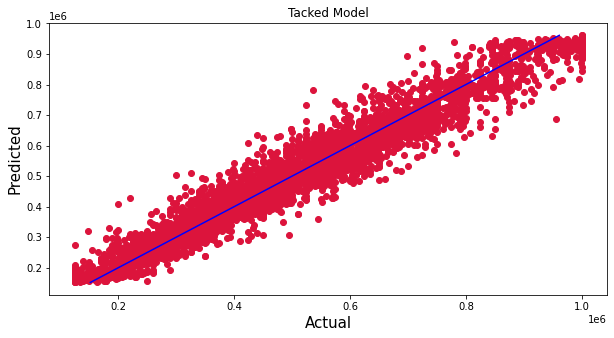

In [85]:
plt.figure(figsize=(10,5))
plt.scatter(y, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_pred))
p2 = min(min(y_pred), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Tacked Model")
plt.show()

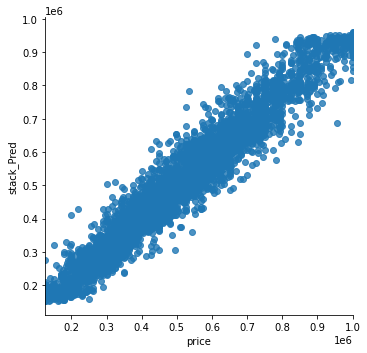

In [87]:
sn.lmplot(x='price',y='stack_Pred',data=data,palette='rainbow')

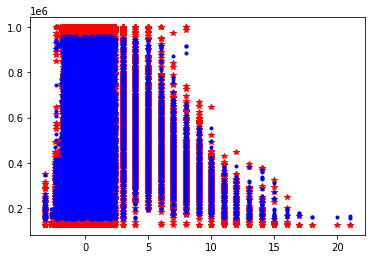

In [88]:
plt.plot(x,y,'r*')
plt.plot(x,stack.predict(x),'b.')
plt.show()

### the above graph shows the closeness of actual and predicted values

<AxesSubplot:xlabel='stack_Pred', ylabel='Density'>

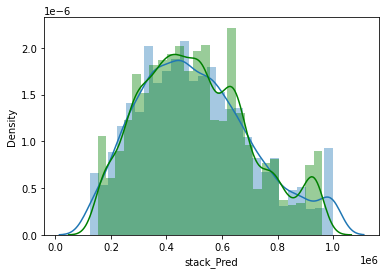

In [91]:
sn.distplot(data['price'])
sn.distplot(data['stack_Pred'],color='g')

### from the above dist plot we can see the closeness between actual and predicted value
### save model
### we achieved an accuracy of 88% to 96%

In [90]:
joblib.dump(stack,'Car.pkl')

['Car.pkl']